#**1 - Data Munging**

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt    
import seaborn as sns 

In [2]:
#Use to import the file into google Colab drive
from google.colab import files 
#Use to import io, which opens the file from the Colab drive
import io

In [3]:
# This will open a widget when run that will enable you to browse the files on your local storage drive.
uploaded = files.upload()

Saving ReviewProSentiment Data.xlsx to ReviewProSentiment Data.xlsx


## (a) Clean Worksheet 1 - Sentiment Data

In [4]:
# Read excel worksheet 1
hotelsentimentdata = pd.read_excel(io.BytesIO(uploaded['ReviewProSentiment Data.xlsx']),sheet_name="Sentiment Data", header = 1)
print(hotelsentimentdata.head())

   Unnamed: 0                         Unnamed: 1     TOT  ...  neu.10  neg.10  nr.10
0         NaN                      Group Average  1135.2  ...    47.8      26      0
1    146727.0  8 on Claymore Serviced Residences    56.0  ...     1.0       2      0
2    121074.0                        Amara Hotel  1352.0  ...    51.0      29      0
3    175340.0     Amara Sanctuary Resort Sentosa  1404.0  ...    56.0      68      0
4    144642.0       Amoy by Far East Hospitality    46.0  ...     2.0       4      0

[5 rows x 57 columns]


In [5]:
# Read all column names from excel worksheet 1
hotelsentimentdata.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'TOT', 'pos', 'neu', 'neg', 'nr', 'TOT.1',
       'pos.1', 'neu.1', 'neg.1', 'nr.1', 'TOT.2', 'pos.2', 'neu.2', 'neg.2',
       'nr.2', 'TOT.3', 'pos.3', 'neu.3', 'neg.3', 'nr.3', 'TOT.4', 'pos.4',
       'neu.4', 'neg.4', 'nr.4', 'TOT.5', 'pos.5', 'neu.5', 'neg.5', 'nr.5',
       'TOT.6', 'pos.6', 'neu.6', 'neg.6', 'nr.6', 'TOT.7', 'pos.7', 'neu.7',
       'neg.7', 'nr.7', 'TOT.8', 'pos.8', 'neu.8', 'neg.8', 'nr.8', 'TOT.9',
       'pos.9', 'neu.9', 'neg.9', 'nr.9', 'TOT.10', 'pos.10', 'neu.10',
       'neg.10', 'nr.10'],
      dtype='object')

In [6]:
# Rename column names
newcolumnname=['ReviewProID', 'HotelName','GRITot','GRIPos','GRINeu','GRINeg','GRINr', 'BCTot','BCPos','BCNeu','BCNeg','BCNr','CleanTot','CleanPos','CleanNeu','CleanNeg','CleanNr', 'DecoTot','DecoPos','DecoNeu','DecoNeg','DecoNr','EntTot','EntPos','EntNeu','EntNeg','EntNr','FnDTot','FnDPos','FnDNeu','FnDNeg','FnDNr','LocTot','LocPos','LocNeu','LocNeg','LocNr','RecTot','RecPos','RecNeu','RecNeg','RecNr','RmTot','RmPos','RmNeu','RmNeg','RmNr','SvcTot','SvcPos','SvcNeu','SvcNeg','SvcNr','ValTot','ValPos','ValNeu','ValNeg','ValNr']
hotelsentimentdata.columns=newcolumnname
print(hotelsentimentdata.columns)

Index(['ReviewProID', 'HotelName', 'GRITot', 'GRIPos', 'GRINeu', 'GRINeg',
       'GRINr', 'BCTot', 'BCPos', 'BCNeu', 'BCNeg', 'BCNr', 'CleanTot',
       'CleanPos', 'CleanNeu', 'CleanNeg', 'CleanNr', 'DecoTot', 'DecoPos',
       'DecoNeu', 'DecoNeg', 'DecoNr', 'EntTot', 'EntPos', 'EntNeu', 'EntNeg',
       'EntNr', 'FnDTot', 'FnDPos', 'FnDNeu', 'FnDNeg', 'FnDNr', 'LocTot',
       'LocPos', 'LocNeu', 'LocNeg', 'LocNr', 'RecTot', 'RecPos', 'RecNeu',
       'RecNeg', 'RecNr', 'RmTot', 'RmPos', 'RmNeu', 'RmNeg', 'RmNr', 'SvcTot',
       'SvcPos', 'SvcNeu', 'SvcNeg', 'SvcNr', 'ValTot', 'ValPos', 'ValNeu',
       'ValNeg', 'ValNr'],
      dtype='object')


In [7]:
# check if revised column names are renamed properly
print(hotelsentimentdata.describe(include='all').T)

            count unique                top  ...     50%     75%     max
ReviewProID   190    NaN                NaN  ...  144562  175339  252748
HotelName     191    191  Summer View Hotel  ...     NaN     NaN     NaN
GRITot        191    NaN                NaN  ...     763    1483    8629
GRIPos        191    NaN                NaN  ...     398     952    6544
GRINeu        191    NaN                NaN  ...     226   443.5    3509
GRINeg        191    NaN                NaN  ...      66   137.5    1162
GRINr         191    NaN                NaN  ...       0       0       8
BCTot         191    NaN                NaN  ...      27      56     535
BCPos         191    NaN                NaN  ...       0       0       1
BCNeu         191    NaN                NaN  ...       0       0       0
BCNeg         191    NaN                NaN  ...      27      56     535
BCNr          191    NaN                NaN  ...       0       0       0
CleanTot      191    NaN                NaN  ...   

In [8]:
# There are 190 ReviewPro ID but 191 data for each columns. To drop row 0 which is showing the Group Average. 
hotelsentimentdata.drop([0], axis=0, inplace=True)

In [9]:
# Check if there are any duplicate ReviewProID in each row. 
hotelsentimentdata.ReviewProID.is_unique

True

In [10]:
# Check if there are any duplicate HotelName in each row. 
hotelsentimentdata.HotelName.is_unique

True

In [11]:
# Check the shape of worksheet 1, after removing the Group Average row. 
hotelsentimentdata.shape

(190, 57)

In [12]:
# After cleaning worksheet 1, hotel sentiment data should looks clean until further analysis proves otherwise. Hence, to continue with other worksheet(s)
hotelsentimentdata.head()

,ReviewProID,HotelName,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr
1,146727.0,8 on Claymore Serviced Residences,56.0,53.0,1.0,2.0,0.0,2,0,0,2,0,41.0,40,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,41.0,0.0,0.0,0,2.0,0.0,0,2.0,0,41.0,38.0,2.0,1.0,0,41.0,39.0,0.0,2.0,0,41.0,38.0,1.0,2,0
2,121074.0,Amara Hotel,1352.0,769.0,465.0,118.0,0.0,20,0,0,20,0,163.0,104,36.0,23.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,135.0,98.0,32.0,5.0,0,20.0,0.0,0,20.0,0,168.0,102.0,50.0,16.0,0,168.0,92.0,44.0,32.0,0,133.0,53.0,51.0,29,0
3,175340.0,Amara Sanctuary Resort Sentosa,1404.0,638.0,515.0,251.0,0.0,74,0,0,74,0,361.0,228,67.0,66.0,0,4.0,2.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0,4.0,2.0,1.0,1.0,0,312.0,228.0,55.0,29.0,0,76.0,1.0,1,74.0,0,250.0,134.0,65.0,51.0,0,369.0,237.0,64.0,68.0,0,196.0,72.0,56.0,68,0
4,144642.0,Amoy by Far East Hospitality,46.0,46.0,0.0,0.0,0.0,19,0,0,19,0,28.0,24,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,21.0,17.0,0.0,4.0,0,19.0,0.0,0,19.0,0,28.0,24.0,0.0,4.0,0,28.0,24.0,0.0,4.0,0,21.0,15.0,2.0,4,0
5,144676.0,Aqueen Hotel Balestier,504.0,160.0,268.0,76.0,0.0,8,0,0,8,0,63.0,49,12.0,2.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,58.0,30.0,21.0,7.0,0,16.0,4.0,3,9.0,0,61.0,31.0,24.0,6.0,0,63.0,47.0,14.0,2.0,0,53.0,38.0,12.0,3,0


## (b) Clean Worksheet 2 - Sentiment Mentions

the team decided not to use this for any analysis. 

In [13]:
# Read excel worksheet 2
hotelsentimentmention = pd.read_excel(io.BytesIO(uploaded['ReviewProSentiment Data.xlsx']),sheet_name="Sentiment Mentions", header = 2)
print(hotelsentimentmention.head())

    Concept  Mentions  Positive  Negative         Related Concepts
0      room   80006.0   61327.0   18679.0  room, bed...and 71 more
1     hotel   50193.0   43738.0    6455.0  room, bed...and 72 more
2     staff   46592.0   43953.0    2639.0  room, bed...and 65 more
3  location   43272.0   41922.0    1350.0  room, bed...and 69 more
4   service   19152.0   17017.0    2135.0  room, bed...and 64 more


In [14]:
hotelsentimentmention = hotelsentimentmention[:85]

In [15]:
hotelsentimentmention.tail()

,Concept,Mentions,Positive,Negative,Related Concepts
80,robbery,1.0,0.0,1.0,"hotel, robbery"
81,accessories,1.0,1.0,0.0,accessories
82,rob,1.0,0.0,1.0,"hotel, rob"
83,cookie,1.0,1.0,0.0,cookie
84,illness,1.0,0.0,1.0,"family, illness"


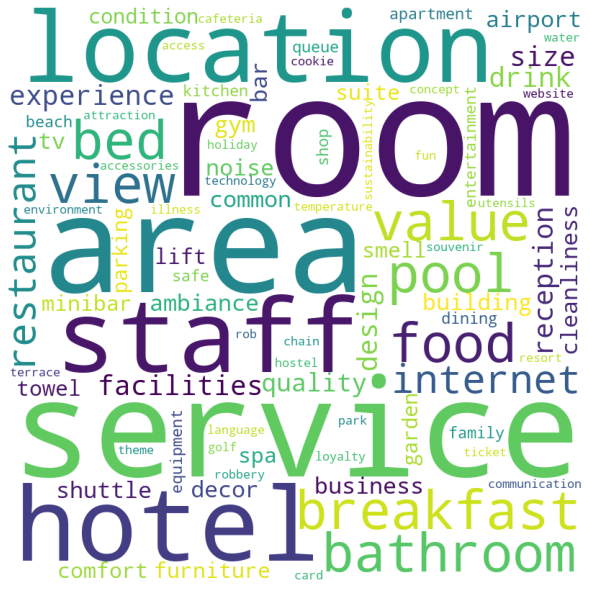

In [16]:
# Import package
from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in hotelsentimentmention.Concept: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## (c) Clean Worksheet 3 - STB Rating

In [17]:
# Read excel worksheet 3
hotelSTBrating = pd.read_excel(io.BytesIO(uploaded['ReviewProSentiment Data.xlsx']),sheet_name="STB Rating", header = 0)
print(hotelSTBrating.head())

                                    Hotel_Name  ... Star_Category
0                    Riverview Hotel Singapore  ...             3
1            Hotel ibis Singapore on Bencoolen  ...             3
2                          Peninsula Excelsior  ...             3
3  Village Hotel Bugis by Far East Hospitality  ...             3
4   Holiday Inn Express Singapore Orchard Road  ...             3

[5 rows x 3 columns]


In [18]:
# Read all columns in excel worksheet 3
hotelSTBrating.columns

Index(['Hotel_Name', 'City_Address', 'Star_Category'], dtype='object')

In [19]:
# Rename the column names in excel worksheet 3 (for standardisation)
newcolumnname1=['HotelName','Address','StarCat']
hotelSTBrating.columns=newcolumnname1
print(hotelSTBrating.columns)

Index(['HotelName', 'Address', 'StarCat'], dtype='object')


In [20]:
# Check the shape of worksheet 3, to ensure that the number of rows matches with worksheet 1. 
hotelSTBrating.shape

(190, 3)

## (d) Merge Sentiment Data and STB Rating into 1 dataframe

For easy analysis in one dataframe

In [21]:
# Using Outer Join to merge both df in worksheet 1 and 3 using the unique HotelName columns that's present in both worksheets. [SentimentData + Rating]
hotelSDR=pd.merge(hotelsentimentdata, hotelSTBrating, on='HotelName', how='outer')
hotelSDR

,ReviewProID,HotelName,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr,Address,StarCat
0,146727.0,8 on Claymore Serviced Residences,56.0,53.0,1.0,2.0,0.0,2,0,0,2,0,41.0,40,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,41.0,0.0,0.0,0,2.0,0.0,0,2.0,0,41.0,38.0,2.0,1.0,0,41.0,39.0,0.0,2.0,0,41.0,38.0,1.0,2,0,"8 Claymore Hill, Orchard",5
1,121074.0,Amara Hotel,1352.0,769.0,465.0,118.0,0.0,20,0,0,20,0,163.0,104,36.0,23.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,135.0,98.0,32.0,5.0,0,20.0,0.0,0,20.0,0,168.0,102.0,50.0,16.0,0,168.0,92.0,44.0,32.0,0,133.0,53.0,51.0,29,0,165 Tanjong Pagar Road,4
2,175340.0,Amara Sanctuary Resort Sentosa,1404.0,638.0,515.0,251.0,0.0,74,0,0,74,0,361.0,228,67.0,66.0,0,4.0,2.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0,4.0,2.0,1.0,1.0,0,312.0,228.0,55.0,29.0,0,76.0,1.0,1,74.0,0,250.0,134.0,65.0,51.0,0,369.0,237.0,64.0,68.0,0,196.0,72.0,56.0,68,0,"1 Larkhill Road, Sentosa",5
3,144642.0,Amoy by Far East Hospitality,46.0,46.0,0.0,0.0,0.0,19,0,0,19,0,28.0,24,0.0,4.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,21.0,17.0,0.0,4.0,0,19.0,0.0,0,19.0,0,28.0,24.0,0.0,4.0,0,28.0,24.0,0.0,4.0,0,21.0,15.0,2.0,4,0,Telok Ayer Street,3
4,144676.0,Aqueen Hotel Balestier,504.0,160.0,268.0,76.0,0.0,8,0,0,8,0,63.0,49,12.0,2.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,58.0,30.0,21.0,7.0,0,16.0,4.0,3,9.0,0,61.0,31.0,24.0,6.0,0,63.0,47.0,14.0,2.0,0,53.0,38.0,12.0,3,0,Balestier Road,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,144587.0,Wanderlust,478.0,331.0,114.0,31.0,2.0,17,0,0,17,0,161.0,149,8.0,4.0,0,0.0,0.0,0.0,0.0,0.0,2.0,0,2.0,0.0,0,4.0,4.0,0.0,0.0,0,132.0,100.0,23.0,9.0,0,26.0,9.0,0,17.0,0,162.0,116.0,23.0,23.0,0,163.0,140.0,16.0,7.0,0,126.0,86.0,27.0,13,0,Dickson Road,3
186,144181.0,Wangz Hotel,825.0,658.0,153.0,14.0,0.0,37,0,0,37,0,273.0,256,11.0,6.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.0,0,9.0,6.0,2.0,1.0,0,226.0,162.0,53.0,11.0,0,47.0,9.0,1,37.0,0,273.0,255.0,11.0,7.0,0,274.0,259.0,8.0,7.0,0,218.0,186.0,23.0,9,0,UNDEFINED,4
187,144280.0,W Singapore Sentosa Cove,1841.0,1451.0,256.0,134.0,0.0,65,0,0,65,0,449.0,410,21.0,18.0,0,1.0,1.0,0.0,0.0,0.0,9.0,9,0.0,0.0,0,8.0,8.0,0.0,0.0,0,396.0,262.0,86.0,48.0,0,75.0,7.0,3,65.0,0,424.0,366.0,33.0,25.0,0,455.0,339.0,47.0,69.0,0,361.0,222.0,88.0,51,0,Ocean Way,5
188,144516.0,York Hotel Singapore,1688.0,806.0,687.0,195.0,0.0,26,0,0,26,0,281.0,202,61.0,18.0,0,4.0,2.0,2.0,0.0,0.0,7.0,2,2.0,3.0,0,18.0,11.0,3.0,4.0,0,289.0,239.0,42.0,8.0,0,42.0,13.0,2,27.0,0,266.0,184.0,60.0,22.0,0,295.0,181.0,82.0,32.0,0,242.0,156.0,63.0,23,0,21 Mount Elizabeth,4


In [22]:
# Check the shape of the revised df 
hotelSDR.shape

(190, 59)

In [23]:
# Check for null values for the worksheet
hotelSDR.isnull().sum()

ReviewProID     0
HotelName       0
GRITot          0
GRIPos          0
GRINeu          0
GRINeg          0
GRINr           0
BCTot           0
BCPos           0
BCNeu           0
BCNeg           0
BCNr            0
CleanTot        0
CleanPos        0
CleanNeu        0
CleanNeg        0
CleanNr         0
DecoTot        20
DecoPos        20
DecoNeu        20
DecoNeg        20
DecoNr         20
EntTot          0
EntPos          0
EntNeu          0
EntNeg          0
EntNr           0
FnDTot          0
FnDPos          0
FnDNeu          0
FnDNeg          0
FnDNr           0
LocTot          0
LocPos          0
LocNeu          0
LocNeg          0
LocNr           0
RecTot          0
RecPos          0
RecNeu          0
RecNeg          0
RecNr           0
RmTot           0
RmPos           0
RmNeu           0
RmNeg           0
RmNr            0
SvcTot          0
SvcPos          0
SvcNeu          0
SvcNeg          0
SvcNr           0
ValTot          0
ValPos          0
ValNeu          0
ValNeg    

In [24]:
# to Fill na with 0
coltofillzero = ['DecoTot','DecoPos','DecoNeu','DecoNeg','DecoNr']
hotelSDR.update(hotelSDR[coltofillzero].fillna(0)) 
hotelSDR.isnull().sum()

ReviewProID    0
HotelName      0
GRITot         0
GRIPos         0
GRINeu         0
GRINeg         0
GRINr          0
BCTot          0
BCPos          0
BCNeu          0
BCNeg          0
BCNr           0
CleanTot       0
CleanPos       0
CleanNeu       0
CleanNeg       0
CleanNr        0
DecoTot        0
DecoPos        0
DecoNeu        0
DecoNeg        0
DecoNr         0
EntTot         0
EntPos         0
EntNeu         0
EntNeg         0
EntNr          0
FnDTot         0
FnDPos         0
FnDNeu         0
FnDNeg         0
FnDNr          0
LocTot         0
LocPos         0
LocNeu         0
LocNeg         0
LocNr          0
RecTot         0
RecPos         0
RecNeu         0
RecNeg         0
RecNr          0
RmTot          0
RmPos          0
RmNeu          0
RmNeg          0
RmNr           0
SvcTot         0
SvcPos         0
SvcNeu         0
SvcNeg         0
SvcNr          0
ValTot         0
ValPos         0
ValNeu         0
ValNeg         0
ValNr          0
Address        0
StarCat       

In [25]:
# Check the head of the revised merged dataframe (hotel sentiment data + STB rating)
hotelSDR.head(10)

,ReviewProID,HotelName,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr,Address,StarCat
0,146727.0,8 on Claymore Serviced Residences,56.0,53.0,1.0,2.0,0.0,2,0,0,2,0,41.0,40,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,41.0,0.0,0.0,0,2.0,0.0,0,2.0,0,41.0,38.0,2.0,1.0,0,41.0,39.0,0.0,2.0,0,41.0,38.0,1.0,2,0,"8 Claymore Hill, Orchard",5
1,121074.0,Amara Hotel,1352.0,769.0,465.0,118.0,0.0,20,0,0,20,0,163.0,104,36.0,23.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,135.0,98.0,32.0,5.0,0,20.0,0.0,0,20.0,0,168.0,102.0,50.0,16.0,0,168.0,92.0,44.0,32.0,0,133.0,53.0,51.0,29,0,165 Tanjong Pagar Road,4
2,175340.0,Amara Sanctuary Resort Sentosa,1404.0,638.0,515.0,251.0,0.0,74,0,0,74,0,361.0,228,67.0,66.0,0,4.0,2.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0,4.0,2.0,1.0,1.0,0,312.0,228.0,55.0,29.0,0,76.0,1.0,1,74.0,0,250.0,134.0,65.0,51.0,0,369.0,237.0,64.0,68.0,0,196.0,72.0,56.0,68,0,"1 Larkhill Road, Sentosa",5
3,144642.0,Amoy by Far East Hospitality,46.0,46.0,0.0,0.0,0.0,19,0,0,19,0,28.0,24,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,21.0,17.0,0.0,4.0,0,19.0,0.0,0,19.0,0,28.0,24.0,0.0,4.0,0,28.0,24.0,0.0,4.0,0,21.0,15.0,2.0,4,0,Telok Ayer Street,3
4,144676.0,Aqueen Hotel Balestier,504.0,160.0,268.0,76.0,0.0,8,0,0,8,0,63.0,49,12.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,58.0,30.0,21.0,7.0,0,16.0,4.0,3,9.0,0,61.0,31.0,24.0,6.0,0,63.0,47.0,14.0,2.0,0,53.0,38.0,12.0,3,0,Balestier Road,3
5,144680.0,Aqueen Hotel Lavender,504.0,170.0,260.0,74.0,0.0,19,0,0,19,0,93.0,73,16.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2.0,1.0,0.0,1.0,0,91.0,59.0,24.0,8.0,0,22.0,2.0,1,19.0,0,95.0,53.0,28.0,14.0,0,95.0,70.0,17.0,8.0,0,89.0,59.0,18.0,12,0,Lavender Street,3
6,252748.0,Aqueen Jalan Besar Hotel,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,Jalan Besar,3
7,183145.0,Arena Suites,37.0,15.0,15.0,7.0,0.0,1,0,0,1,0,2.0,2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,2.0,0.0,1.0,1.0,0,1.0,0.0,0,1.0,0,2.0,2.0,0.0,0.0,0,2.0,1.0,1.0,0.0,0,2.0,1.0,1.0,0,0,Upper Jurong Road,3
8,133649.0,Ascott Raffles Place Singapore,206.0,168.0,34.0,4.0,0.0,4,0,0,4,0,55.0,54,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,38.0,3.0,0.0,0,4.0,0.0,0,4.0,0,55.0,52.0,1.0,2.0,0,57.0,48.0,6.0,3.0,0,41.0,36.0,2.0,3,0,No 2 Finlayson Green,4
9,144574.0,Bay Hotel Singapore,1421.0,525.0,606.0,290.0,0.0,19,0,0,19,0,177.0,100,46.0,31.0,0,0.0,0.0,0.0,0.0,0.0,4.0,2,1.0,1.0,0,5.0,3.0,2.0,0.0,0,137.0,107.0,22.0,8.0,0,30.0,8.0,3,19.0,0,168.0,51.0,48.0,69.0,0,178.0,100.0,54.0,24.0,0,123.0,46.0,38.0,39,0,Telok Blangah Road (Hotel entrance via Temengg...,4


In [26]:
# Drop row 6 - as it contains full row of 0 values which is not value-adding to our analysis. 
hotelSDR.drop([6], inplace=True) 

In [27]:
# Checking data again, to ensure the above action is complete and permanent. 
hotelSDR.head(10)

,ReviewProID,HotelName,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr,Address,StarCat
0,146727.0,8 on Claymore Serviced Residences,56.0,53.0,1.0,2.0,0.0,2,0,0,2,0,41.0,40,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,41.0,0.0,0.0,0,2.0,0.0,0,2.0,0,41.0,38.0,2.0,1.0,0,41.0,39.0,0.0,2.0,0,41.0,38.0,1.0,2,0,"8 Claymore Hill, Orchard",5
1,121074.0,Amara Hotel,1352.0,769.0,465.0,118.0,0.0,20,0,0,20,0,163.0,104,36.0,23.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,135.0,98.0,32.0,5.0,0,20.0,0.0,0,20.0,0,168.0,102.0,50.0,16.0,0,168.0,92.0,44.0,32.0,0,133.0,53.0,51.0,29,0,165 Tanjong Pagar Road,4
2,175340.0,Amara Sanctuary Resort Sentosa,1404.0,638.0,515.0,251.0,0.0,74,0,0,74,0,361.0,228,67.0,66.0,0,4.0,2.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0,4.0,2.0,1.0,1.0,0,312.0,228.0,55.0,29.0,0,76.0,1.0,1,74.0,0,250.0,134.0,65.0,51.0,0,369.0,237.0,64.0,68.0,0,196.0,72.0,56.0,68,0,"1 Larkhill Road, Sentosa",5
3,144642.0,Amoy by Far East Hospitality,46.0,46.0,0.0,0.0,0.0,19,0,0,19,0,28.0,24,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,21.0,17.0,0.0,4.0,0,19.0,0.0,0,19.0,0,28.0,24.0,0.0,4.0,0,28.0,24.0,0.0,4.0,0,21.0,15.0,2.0,4,0,Telok Ayer Street,3
4,144676.0,Aqueen Hotel Balestier,504.0,160.0,268.0,76.0,0.0,8,0,0,8,0,63.0,49,12.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,58.0,30.0,21.0,7.0,0,16.0,4.0,3,9.0,0,61.0,31.0,24.0,6.0,0,63.0,47.0,14.0,2.0,0,53.0,38.0,12.0,3,0,Balestier Road,3
5,144680.0,Aqueen Hotel Lavender,504.0,170.0,260.0,74.0,0.0,19,0,0,19,0,93.0,73,16.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2.0,1.0,0.0,1.0,0,91.0,59.0,24.0,8.0,0,22.0,2.0,1,19.0,0,95.0,53.0,28.0,14.0,0,95.0,70.0,17.0,8.0,0,89.0,59.0,18.0,12,0,Lavender Street,3
7,183145.0,Arena Suites,37.0,15.0,15.0,7.0,0.0,1,0,0,1,0,2.0,2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,2.0,0.0,1.0,1.0,0,1.0,0.0,0,1.0,0,2.0,2.0,0.0,0.0,0,2.0,1.0,1.0,0.0,0,2.0,1.0,1.0,0,0,Upper Jurong Road,3
8,133649.0,Ascott Raffles Place Singapore,206.0,168.0,34.0,4.0,0.0,4,0,0,4,0,55.0,54,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,38.0,3.0,0.0,0,4.0,0.0,0,4.0,0,55.0,52.0,1.0,2.0,0,57.0,48.0,6.0,3.0,0,41.0,36.0,2.0,3,0,No 2 Finlayson Green,4
9,144574.0,Bay Hotel Singapore,1421.0,525.0,606.0,290.0,0.0,19,0,0,19,0,177.0,100,46.0,31.0,0,0.0,0.0,0.0,0.0,0.0,4.0,2,1.0,1.0,0,5.0,3.0,2.0,0.0,0,137.0,107.0,22.0,8.0,0,30.0,8.0,3,19.0,0,168.0,51.0,48.0,69.0,0,178.0,100.0,54.0,24.0,0,123.0,46.0,38.0,39,0,Telok Blangah Road (Hotel entrance via Temengg...,4
10,144685.0,Bayview Hotel Singapore,845.0,258.0,433.0,154.0,0.0,11,0,0,11,0,145.0,71,45.0,29.0,0,0.0,0.0,0.0,0.0,0.0,5.0,1,2.0,2.0,0,9.0,2.0,1.0,6.0,0,102.0,85.0,13.0,4.0,0,35.0,13.0,7,15.0,0,149.0,57.0,66.0,26.0,0,147.0,76.0,49.0,22.0,0,92.0,41.0,34.0,17,0,30 Bencoolen Street Singapore,3


In [28]:
#Checking dtypes of hotelSDR
hotelSDR.dtypes

ReviewProID    float64
HotelName       object
GRITot         float64
GRIPos         float64
GRINeu         float64
GRINeg         float64
GRINr          float64
BCTot            int64
BCPos            int64
BCNeu            int64
BCNeg            int64
BCNr             int64
CleanTot       float64
CleanPos         int64
CleanNeu       float64
CleanNeg       float64
CleanNr          int64
DecoTot        float64
DecoPos        float64
DecoNeu        float64
DecoNeg        float64
DecoNr         float64
EntTot         float64
EntPos           int64
EntNeu         float64
EntNeg         float64
EntNr            int64
FnDTot         float64
FnDPos         float64
FnDNeu         float64
FnDNeg         float64
FnDNr            int64
LocTot         float64
LocPos         float64
LocNeu         float64
LocNeg         float64
LocNr            int64
RecTot         float64
RecPos         float64
RecNeu           int64
RecNeg         float64
RecNr            int64
RmTot          float64
RmPos      

In [29]:
# review hotelSDR description
hotelSDR.describe(include='all')

,ReviewProID,HotelName,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr,Address,StarCat
count,189.000000,189,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.0,189,189.000000
unique,NaN,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184,NaN
top,NaN,Summer View Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8 Sentosa Gateway, Sentosa Island",NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
mean,147446.201058,NaN,1141.216931,693.042328,332.973545,115.116402,0.084656,42.264550,0.005291,0.0,42.259259,0.0,283.386243,233.269841,30.232804,19.883598,0.0,2.412698,1.455026,0.656085,0.301587,0.0,4.253968,3.026455,0.825397,0.402116,0.0,7.100529,4.878307,1.333333,0.888889,0.0,247.671958,209.005291,25.989418,12.677249,0.0,50.513228,6.624339,1.026455,42.862434,0.0,259.666667,186.772487,46.846561,26.047619,0.0,289.761905,219.100529,42.100529,28.560847,0.0,211.645503,137.481481,48.031746,26.132275,0.0,NaN,3.851852
std,23233.513981,NaN,1338.199012,898.124250,414.031611,151.507802,0.630119,53.786654,0.072739,0.0,53.781685,0.0,379.428986,329.094399,38.788279,27.322098,0.0,7.992619,4.559808,2.575091,1.352322,0.0,11.264190,9.949037,1.658694,0.915119,0.0,15.265921,11.919544,3.082207,1.648124,0.0,342.134723,300.747959,37.456356,20.230232,0.0,65.896648,11.482255,2.239476,54.643741,0.0,372.405221,302.414391,61.893377,32.813510,0.0,397.088823,301.580774,63.781421,47.874867,0.0,305.358207,195.073216,75.908743,45.242003,0.0,NaN,0.743238
min,108010.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN,3.000000
25%,133480.000000,NaN,255.000000,130.000000,73.000000,25.000000,0.000000,10.000000,0.000000,0.0,10.000000,0.0,48.000000,34.000000,5.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,44.000000,28.000000,5.000000,3.000000,0.0,11.000000,0.000000,0.000000,10.000000,0.0,46.000000,23.000000,9.000000,5.000000,0.0,50.000000,27.000000,8.000000,5.000000,0.0,39.000000,19.000000,9.000000,5.000000,0.0,NaN,3.000000
50%,144559.000000,NaN,763.000000,398.000000,226.000000,66.000000,0.000000,27.000000,0.000000,0.0,27.000000,0.0,177.000000,123.000000,18.000000,13.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000

# 2 - Analysis

## (a) Analysis - 1


In [30]:
# Making a duplicate of hotelSDR for our first analysis 
hotelSDR_A1 = hotelSDR.copy(deep=True)

In [31]:
#Finding hotelSDR_A1 correlations
hotelSDR_A1_corr = hotelSDR_A1.corr()
hotelSDR_A1_corr

,ReviewProID,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr,StarCat
ReviewProID,1.000000,-0.451861,-0.507284,-0.310270,-0.135792,-0.064274,-0.278893,-0.008930,NaN,-0.278907,NaN,-0.485445,-0.495287,-0.329124,-0.308528,NaN,-0.272125,-0.320838,-0.186900,-0.170628,NaN,-0.348901,-0.292461,-0.456373,-0.287824,NaN,-0.377497,-0.370828,-0.344041,-0.171305,NaN,-0.475342,-0.479584,-0.314134,-0.327759,NaN,-0.329464,-0.480052,-0.322411,-0.283225,NaN,-0.472711,-0.467709,-0.411847,-0.277557,NaN,-0.478031,-0.509719,-0.327517,-0.317705,NaN,-0.469880,-0.498211,-0.421039,-0.316821,NaN,-0.246343
GRITot,-0.451861,1.000000,0.953085,0.885120,0.763603,0.080072,0.735909,0.347149,NaN,0.735507,NaN,0.854939,0.819699,0.847668,0.796089,NaN,0.648818,0.629465,0.579194,0.609351,NaN,0.598198,0.537165,0.523139,0.575022,NaN,0.626823,0.577404,0.615276,0.479471,NaN,0.829504,0.832477,0.571210,0.595205,NaN,0.763311,0.730853,0.625657,0.741286,NaN,0.813156,0.740334,0.843011,0.815493,NaN,0.850538,0.816016,0.848668,0.783614,NaN,0.785005,0.743273,0.796994,0.756291,NaN,0.146451
GRIPos,-0.507284,0.953085,1.000000,0.707155,0.557378,0.098571,0.810459,0.173342,NaN,0.810300,NaN,0.913944,0.904936,0.729267,0.756908,NaN,0.688457,0.710361,0.574417,0.579955,NaN,0.691071,0.643928,0.548350,0.511779,NaN,0.712825,0.694404,0.641989,0.379957,NaN,0.896033,0.904632,0.568514,0.652659,NaN,0.833517,0.798499,0.581723,0.813535,NaN,0.885191,0.858341,0.758990,0.703940,NaN,0.910837,0.908436,0.786052,0.784982,NaN,0.866753,0.851911,0.831998,0.780893,NaN,0.276150
GRINeu,-0.310270,0.885120,0.707155,1.000000,0.893017,0.035648,0.467947,0.560949,NaN,0.467232,NaN,0.601073,0.535941,0.853583,0.680053,NaN,0.456449,0.378829,0.467129,0.530890,NaN,0.330344,0.255356,0.393055,0.577572,NaN,0.366570,0.278267,0.458566,0.525335,NaN,0.567647,0.562874,0.459220,0.382000,NaN,0.500296,0.495578,0.570166,0.475821,NaN,0.547361,0.419104,0.817663,0.807259,NaN,0.594614,0.522249,0.772781,0.612542,NaN,0.509324,0.441113,0.587149,0.550530,NaN,-0.084227
GRINeg,-0.135792,0.763603,0.557378,0.893017,1.000000,0.021347,0.416521,0.505285,NaN,0.415876,NaN,0.490532,0.410641,0.831234,0.685897,NaN,0.402178,0.313584,0.433928,0.493353,NaN,0.283451,0.228727,0.295666,0.466403,NaN,0.308424,0.222319,0.375543,0.546636,NaN,0.463327,0.451612,0.420150,0.344113,NaN,0.433426,0.367028,0.519571,0.424265,NaN,0.438705,0.305149,0.711994,0.823651,NaN,0.487718,0.394732,0.724264,0.593827,NaN,0.403245,0.308955,0.502648,0.546172,NaN,-0.113639
GRINr,-0.064274,0.080072,0.098571,0.035648,0.021347,1.000000,0.076081,0.106227,NaN,0.075945,NaN,0.096685,0.100209,0.043586,0.073799,NaN,0.017318,-0.000519,0.047542,0.013574,NaN,0.195548,0.201578,0.070199,0.088243,NaN,0.171635,0.200385,0.029214,0.085934,NaN,0.112663,0.122460,0.013560,0.059738,NaN,0.086186,0.131605,0.013482,0.075727,NaN,0.097478,0.099865,0.060073,0.072608,NaN,0.098635,0.111582,0.041080,0.060484,NaN,0.111122,0.130309,0.072116,0.067149,NaN,0.083711
BCTot,-0.278893,0.735909,0.810459,0.467947,0.416521,0.076081,1.000000,0.068978,NaN,0.999999,NaN,0.914221,0.915869,0.661951,0.724639,NaN,0.728285,0.717339,0.658020,0.632630,NaN,0.822067,0.804481,0.513860,0.441223,NaN,0.808571,0.816094,0.680187,0.315293,NaN,0.913930,0.908238,0.667415,0.718605,NaN,0.991864,0.823116,0.570964,0.999760,NaN,0.927072,0.917200,0.722884,0.704897,NaN,0.916344,0.910059,0.784858,0.822023,NaN,0.929310,0.905360,0.894562,0.867687,NaN,0.256988
BCPos,-0.008930,0.347149,0.173342,0.560949,0.505285,0.106227,0.068978,1.000000,NaN,0.067632,NaN,0.163936,0.114820,0.457681,0.243868,NaN,0.142612,0.024777,0.208549,0.362214,NaN,0.076254,0.036556,0.139957,0.287503,NaN,0.052210,0.006882,0.063267,0.315515,NaN,0.159730,0.160476,0.132777,0.069

Text(0.5, 1.0, 'Correlation Heatmap')

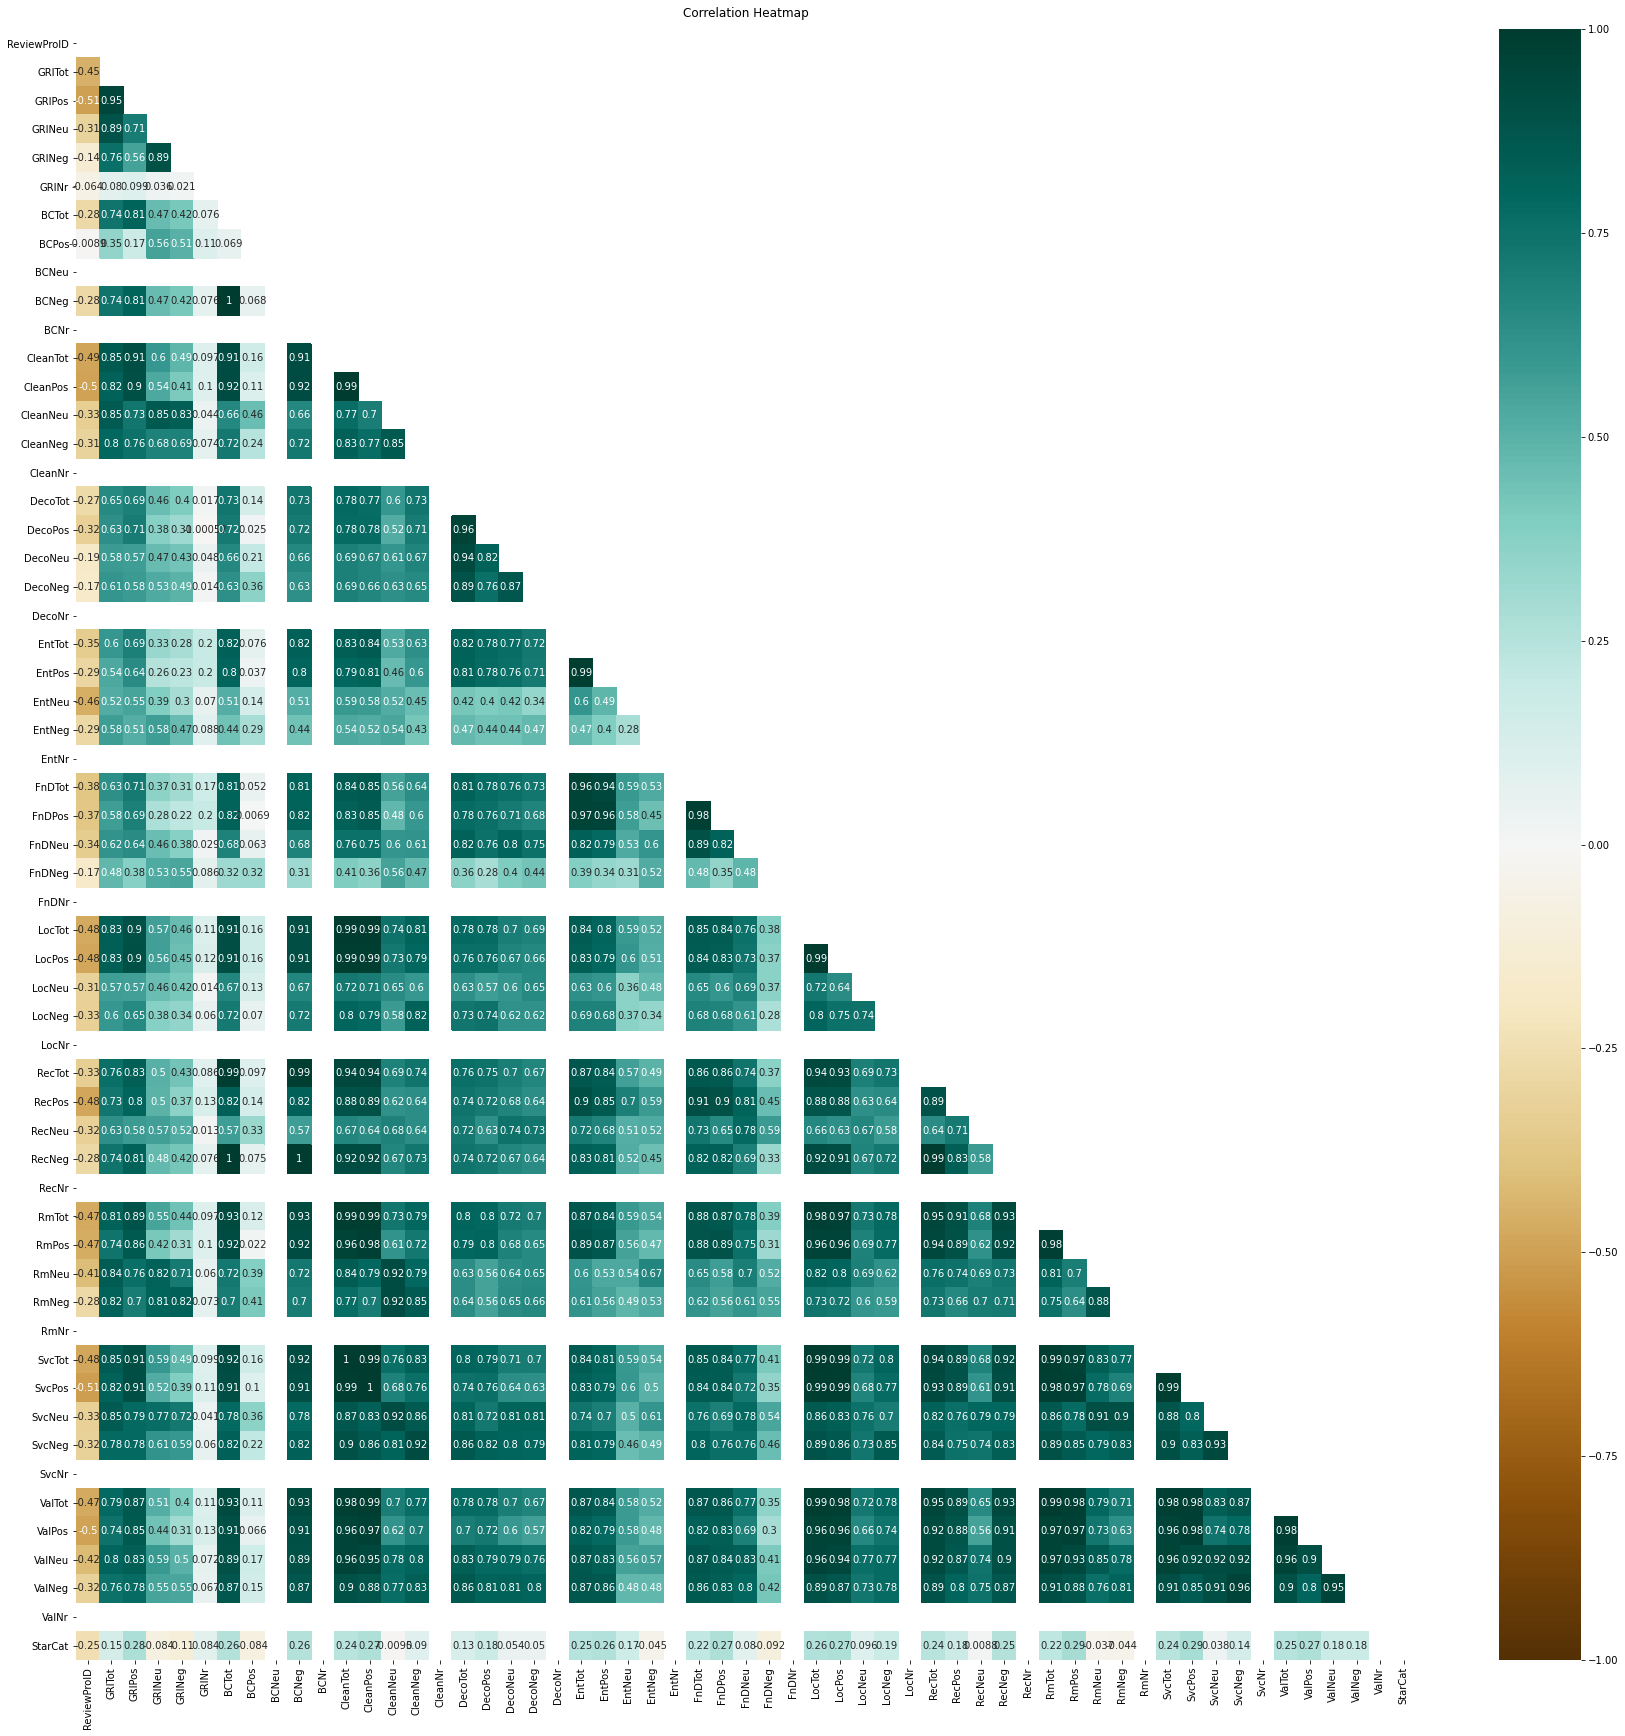

In [32]:
# triangle mask for heatmap to observe the correlation between every column and row 
mask = np.triu(np.ones_like(hotelSDR_A1_corr, dtype=np.bool))

# heatmap with triangle mask
plt.subplots(figsize=(30, 30))
heatmap1 = sns.heatmap(hotelSDR_A1_corr, mask=mask, cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

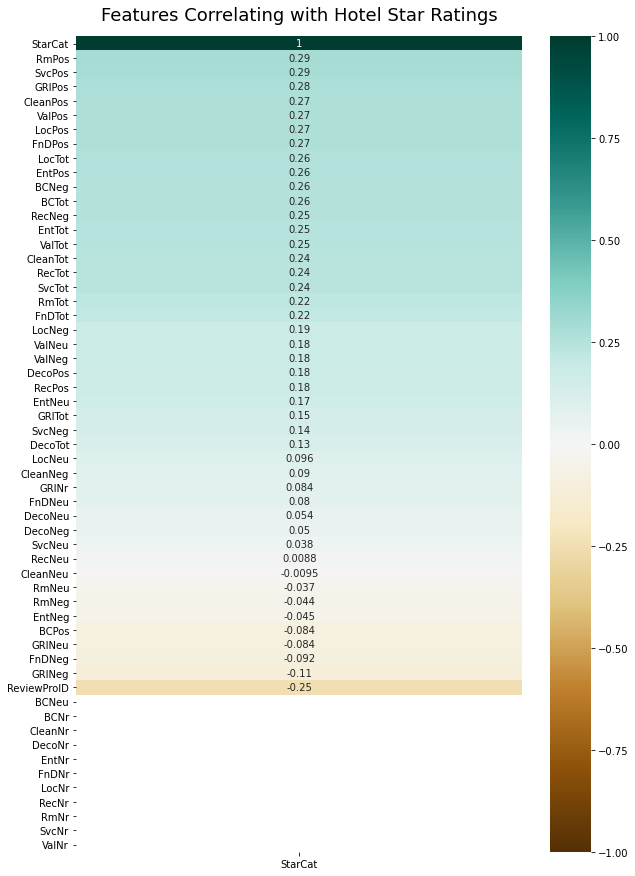

In [33]:
# Correlation between the features and hotel star ratings
plt.figure(figsize=(10, 15))
heatmap1A = sns.heatmap(hotelSDR_A1_corr[['StarCat']].sort_values(by='StarCat', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap1A.set_title('Features Correlating with Hotel Star Ratings', fontdict={'fontsize':18}, pad=16);

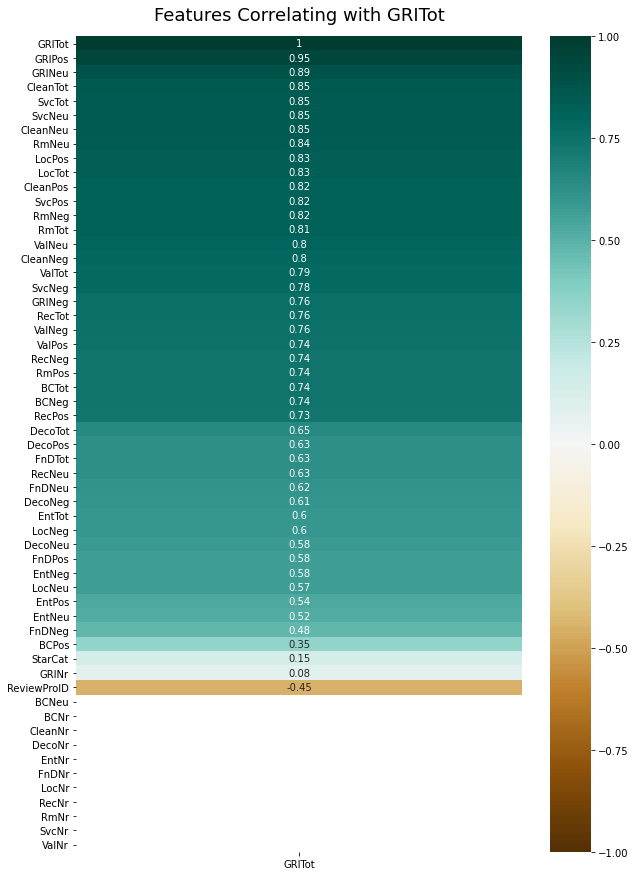

In [34]:
# Correlation between the features with GRI Total
plt.figure(figsize=(10, 15))
heatmap1B = sns.heatmap(hotelSDR_A1_corr[['GRITot']].sort_values(by='GRITot', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap1B.set_title('Features Correlating with GRITot', fontdict={'fontsize':18}, pad=16);

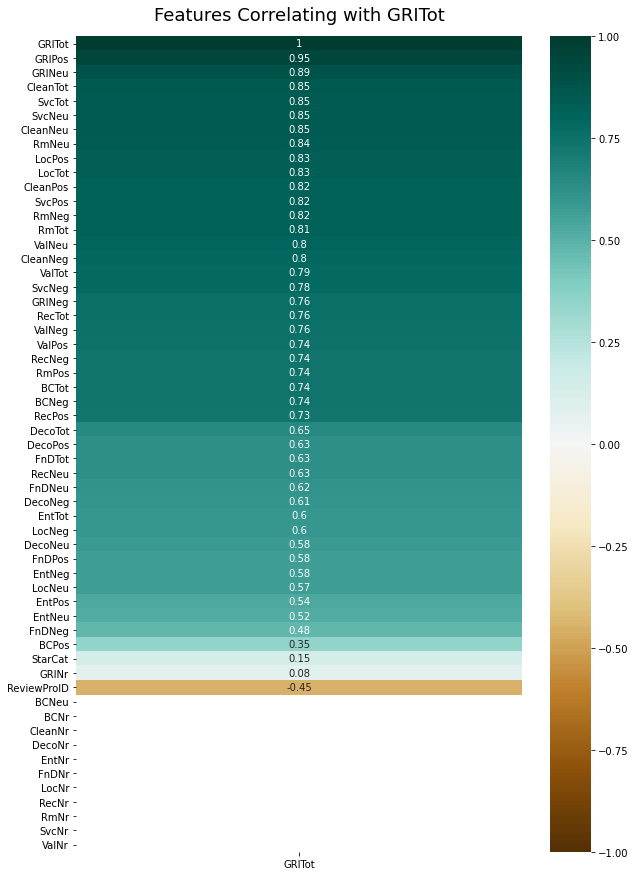

In [35]:
# Correlation with GRITotal Score
plt.figure(figsize=(10, 15))
heatmap1C = sns.heatmap(hotelSDR_A1_corr[['GRITot']].sort_values(by='GRITot', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap1C.set_title('Features Correlating with GRITot', fontdict={'fontsize':18}, pad=16);

-- From the above correlations and maps, we noted that there are too many variables that is preventing us from meeting the objectives. Hence, we decided to remove some fields for better focus and analysis. 

## (b) Analysis - 2

-- We decided to create a duplicate dataframe from the hotelSDR. The purpose is to do a test check on the correlation of positive and negative columns in percentages from the GRI Total. 

In [36]:
# Create duplicate from hotelSDR for second analysis 
hotelSDR_A2 = hotelSDR.copy(deep=True) 
hotelSDR_A2.head()

,ReviewProID,HotelName,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr,Address,StarCat
0,146727.0,8 on Claymore Serviced Residences,56.0,53.0,1.0,2.0,0.0,2,0,0,2,0,41.0,40,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,41.0,0.0,0.0,0,2.0,0.0,0,2.0,0,41.0,38.0,2.0,1.0,0,41.0,39.0,0.0,2.0,0,41.0,38.0,1.0,2,0,"8 Claymore Hill, Orchard",5
1,121074.0,Amara Hotel,1352.0,769.0,465.0,118.0,0.0,20,0,0,20,0,163.0,104,36.0,23.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,135.0,98.0,32.0,5.0,0,20.0,0.0,0,20.0,0,168.0,102.0,50.0,16.0,0,168.0,92.0,44.0,32.0,0,133.0,53.0,51.0,29,0,165 Tanjong Pagar Road,4
2,175340.0,Amara Sanctuary Resort Sentosa,1404.0,638.0,515.0,251.0,0.0,74,0,0,74,0,361.0,228,67.0,66.0,0,4.0,2.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0,4.0,2.0,1.0,1.0,0,312.0,228.0,55.0,29.0,0,76.0,1.0,1,74.0,0,250.0,134.0,65.0,51.0,0,369.0,237.0,64.0,68.0,0,196.0,72.0,56.0,68,0,"1 Larkhill Road, Sentosa",5
3,144642.0,Amoy by Far East Hospitality,46.0,46.0,0.0,0.0,0.0,19,0,0,19,0,28.0,24,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,21.0,17.0,0.0,4.0,0,19.0,0.0,0,19.0,0,28.0,24.0,0.0,4.0,0,28.0,24.0,0.0,4.0,0,21.0,15.0,2.0,4,0,Telok Ayer Street,3
4,144676.0,Aqueen Hotel Balestier,504.0,160.0,268.0,76.0,0.0,8,0,0,8,0,63.0,49,12.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,58.0,30.0,21.0,7.0,0,16.0,4.0,3,9.0,0,61.0,31.0,24.0,6.0,0,63.0,47.0,14.0,2.0,0,53.0,38.0,12.0,3,0,Balestier Road,3


In [37]:
#Checking duplicate hotelSDR_A2
hotelSDR_A2.head()

,ReviewProID,HotelName,GRITot,GRIPos,GRINeu,GRINeg,GRINr,BCTot,BCPos,BCNeu,BCNeg,BCNr,CleanTot,CleanPos,CleanNeu,CleanNeg,CleanNr,DecoTot,DecoPos,DecoNeu,DecoNeg,DecoNr,EntTot,EntPos,EntNeu,EntNeg,EntNr,FnDTot,FnDPos,FnDNeu,FnDNeg,FnDNr,LocTot,LocPos,LocNeu,LocNeg,LocNr,RecTot,RecPos,RecNeu,RecNeg,RecNr,RmTot,RmPos,RmNeu,RmNeg,RmNr,SvcTot,SvcPos,SvcNeu,SvcNeg,SvcNr,ValTot,ValPos,ValNeu,ValNeg,ValNr,Address,StarCat
0,146727.0,8 on Claymore Serviced Residences,56.0,53.0,1.0,2.0,0.0,2,0,0,2,0,41.0,40,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,41.0,41.0,0.0,0.0,0,2.0,0.0,0,2.0,0,41.0,38.0,2.0,1.0,0,41.0,39.0,0.0,2.0,0,41.0,38.0,1.0,2,0,"8 Claymore Hill, Orchard",5
1,121074.0,Amara Hotel,1352.0,769.0,465.0,118.0,0.0,20,0,0,20,0,163.0,104,36.0,23.0,0,2.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,135.0,98.0,32.0,5.0,0,20.0,0.0,0,20.0,0,168.0,102.0,50.0,16.0,0,168.0,92.0,44.0,32.0,0,133.0,53.0,51.0,29,0,165 Tanjong Pagar Road,4
2,175340.0,Amara Sanctuary Resort Sentosa,1404.0,638.0,515.0,251.0,0.0,74,0,0,74,0,361.0,228,67.0,66.0,0,4.0,2.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0,4.0,2.0,1.0,1.0,0,312.0,228.0,55.0,29.0,0,76.0,1.0,1,74.0,0,250.0,134.0,65.0,51.0,0,369.0,237.0,64.0,68.0,0,196.0,72.0,56.0,68,0,"1 Larkhill Road, Sentosa",5
3,144642.0,Amoy by Far East Hospitality,46.0,46.0,0.0,0.0,0.0,19,0,0,19,0,28.0,24,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,21.0,17.0,0.0,4.0,0,19.0,0.0,0,19.0,0,28.0,24.0,0.0,4.0,0,28.0,24.0,0.0,4.0,0,21.0,15.0,2.0,4,0,Telok Ayer Street,3
4,144676.0,Aqueen Hotel Balestier,504.0,160.0,268.0,76.0,0.0,8,0,0,8,0,63.0,49,12.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,58.0,30.0,21.0,7.0,0,16.0,4.0,3,9.0,0,61.0,31.0,24.0,6.0,0,63.0,47.0,14.0,2.0,0,53.0,38.0,12.0,3,0,Balestier Road,3


In [38]:
#Checking column names in hotelSDR_A2
hotelSDR_A2.columns

Index(['ReviewProID', 'HotelName', 'GRITot', 'GRIPos', 'GRINeu', 'GRINeg',
       'GRINr', 'BCTot', 'BCPos', 'BCNeu', 'BCNeg', 'BCNr', 'CleanTot',
       'CleanPos', 'CleanNeu', 'CleanNeg', 'CleanNr', 'DecoTot', 'DecoPos',
       'DecoNeu', 'DecoNeg', 'DecoNr', 'EntTot', 'EntPos', 'EntNeu', 'EntNeg',
       'EntNr', 'FnDTot', 'FnDPos', 'FnDNeu', 'FnDNeg', 'FnDNr', 'LocTot',
       'LocPos', 'LocNeu', 'LocNeg', 'LocNr', 'RecTot', 'RecPos', 'RecNeu',
       'RecNeg', 'RecNr', 'RmTot', 'RmPos', 'RmNeu', 'RmNeg', 'RmNr', 'SvcTot',
       'SvcPos', 'SvcNeu', 'SvcNeg', 'SvcNr', 'ValTot', 'ValPos', 'ValNeu',
       'ValNeg', 'ValNr', 'Address', 'StarCat'],
      dtype='object')

In [39]:
# Slicing and normalizing rows of pandas hotelSDR_A2 by their sums   
hotelSDR_A2[['GRIPos%','GRINeu%','GRINeg%','GRINr%']] = hotelSDR_A2.loc[:, 'GRIPos':'GRINr'].div(hotelSDR_A2.loc[:, 'GRIPos':'GRINr'].sum(axis=1), axis=0)
hotelSDR_A2[['BCPos%','BCNeu%','BCNeg%','BCNr%']] = hotelSDR_A2.loc[:, 'BCPos':'BCNr'].div(hotelSDR_A2.loc[:, 'BCPos':'BCNr'].sum(axis=1), axis=0)
hotelSDR_A2[['CleanPos%','CleanNeu%','CleanNeg%','CleanNr%']] = hotelSDR_A2.loc[:, 'CleanPos':'CleanNr'].div(hotelSDR_A2.loc[:, 'CleanPos':'CleanNr'].sum(axis=1), axis=0)
hotelSDR_A2[['DecoPos%','DecoNeu%','DecoNeg%','DecoNr%']] = hotelSDR_A2.loc[:, 'DecoPos':'DecoNr'].div(hotelSDR_A2.loc[:, 'DecoPos':'DecoNr'].sum(axis=1), axis=0)
hotelSDR_A2[['EntPos%','EntNeu%','EntNeg%','EntNr%']] = hotelSDR_A2.loc[:, 'EntPos':'EntNr'].div(hotelSDR_A2.loc[:, 'EntPos':'EntNr'].sum(axis=1), axis=0)
hotelSDR_A2[['FnDPos%','FnDNeu%','FnDNeg%','FnDNr%']] = hotelSDR_A2.loc[:, 'FnDPos':'FnDNr'].div(hotelSDR_A2.loc[:, 'FnDPos':'FnDNr'].sum(axis=1), axis=0)
hotelSDR_A2[['LocPos%','LocNeu%','LocNeg%','LocNr%']] = hotelSDR_A2.loc[:, 'LocPos':'LocNr'].div(hotelSDR_A2.loc[:, 'LocPos':'LocNr'].sum(axis=1), axis=0)
hotelSDR_A2[['RecPos%','RecNeu%','RecNeg%','RecNr%']] = hotelSDR_A2.loc[:, 'RecPos':'RecNr'].div(hotelSDR_A2.loc[:, 'RecPos':'RecNr'].sum(axis=1), axis=0)
hotelSDR_A2[['RmPos%','RmNeu%','RmNeg%','RmNr%']] = hotelSDR_A2.loc[:, 'RmPos':'RmNr'].div(hotelSDR_A2.loc[:, 'RmPos':'RmNr'].sum(axis=1), axis=0)
hotelSDR_A2[['SvcPos%','SvcNeu%','SvcNeg%','SvcNr%']] = hotelSDR_A2.loc[:, 'SvcPos':'SvcNr'].div(hotelSDR_A2.loc[:, 'SvcPos':'SvcNr'].sum(axis=1), axis=0)
hotelSDR_A2[['ValPos%','ValNeu%','ValNeg%','ValNr%']]= hotelSDR_A2.loc[:, 'ValPos':'ValNr'].div(hotelSDR_A2.loc[:, 'ValPos':'ValNr'].sum(axis=1), axis=0)

In [40]:
# Compute our Customer Satisfaction Score using Pos less Neg as mentioned in google slides.
hotelSDR_A2['cus_satisf'] = hotelSDR_A2['GRIPos%'] - hotelSDR_A2['GRINeg%']  
hotelSDR_A2['cus_satisf']

0      0.910714
1      0.481509
2      0.275641
3      1.000000
4      0.166667
         ...   
185    0.627615
186    0.780606
187    0.715372
188    0.361967
189    0.238817
Name: cus_satisf, Length: 189, dtype: float64

In [41]:
# Doing random check on the first few rows of the hotelSDR_A2 we created above - Check 1
hotelSDR_A2['FnDPos%'].head()

0    NaN
1    NaN
2    0.5
3    NaN
4    0.0
Name: FnDPos%, dtype: float64

In [42]:
# Doing random check on the first few rows of the hotelSDR_A2 we created above - Check 2
hotelSDR_A2['FnDNeu%'].head()

0     NaN
1     NaN
2    0.25
3     NaN
4    1.00
Name: FnDNeu%, dtype: float64

In [43]:
# Conduct separate test on the new total, if we are dropping neutral and no review columns
hotelSDR_A2["GRIPosNeu%"] = hotelSDR_A2["GRIPos%"]+hotelSDR_A2["GRINeu%"]

In [44]:
hotelSDR_A2.columns

Index(['ReviewProID', 'HotelName', 'GRITot', 'GRIPos', 'GRINeu', 'GRINeg',
       'GRINr', 'BCTot', 'BCPos', 'BCNeu',
       ...
       'SvcPos%', 'SvcNeu%', 'SvcNeg%', 'SvcNr%', 'ValPos%', 'ValNeu%',
       'ValNeg%', 'ValNr%', 'cus_satisf', 'GRIPosNeu%'],
      dtype='object', length=105)

In [45]:
# Slicing hotelSDR_A2's columns for easy analysis
hotelSDR_A2 = hotelSDR_A2[['ReviewProID', 'HotelName', 'cus_satisf', 'StarCat', 'GRITot', 'GRIPos','GRINeu','GRINeg','GRIPosNeu%','GRIPos%','GRINeu%','GRINeg%','GRINr%','BCPos%', 'BCNeu%', 'BCNeg%', 'BCNr%','CleanPos%', 'CleanNeu%', 'CleanNeg%', 'CleanNr%', 'DecoPos%','DecoNeu%', 'DecoNeg%', 'DecoNr%', 'EntPos%', 'EntNeu%', 'EntNeg%','EntNr%',  'FnDPos%', 'FnDNeu%', 'FnDNeg%', 'FnDNr%','LocPos%', 'LocNeu%', 'LocNeg%', 'LocNr%',  'RecPos%', 'RecNeu%','RecNeg%', 'RecNr%',  'RmPos%', 'RmNeu%', 'RmNeg%', 'RmNr%','SvcPos%', 'SvcNeu%', 'SvcNeg%', 'SvcNr%',  'ValPos%', 'ValNeu%','ValNeg%', 'ValNr%']]

In [46]:
hotelSDR_A2.head(6)

,ReviewProID,HotelName,cus_satisf,StarCat,GRITot,GRIPos,GRINeu,GRINeg,GRIPosNeu%,GRIPos%,GRINeu%,GRINeg%,GRINr%,BCPos%,BCNeu%,BCNeg%,BCNr%,CleanPos%,CleanNeu%,CleanNeg%,CleanNr%,DecoPos%,DecoNeu%,DecoNeg%,DecoNr%,EntPos%,EntNeu%,EntNeg%,EntNr%,FnDPos%,FnDNeu%,FnDNeg%,FnDNr%,LocPos%,LocNeu%,LocNeg%,LocNr%,RecPos%,RecNeu%,RecNeg%,RecNr%,RmPos%,RmNeu%,RmNeg%,RmNr%,SvcPos%,SvcNeu%,SvcNeg%,SvcNr%,ValPos%,ValNeu%,ValNeg%,ValNr%
0,146727.0,8 on Claymore Serviced Residences,0.910714,5,56.0,53.0,1.0,2.0,0.964286,0.946429,0.017857,0.035714,0.0,0.0,0.0,1.0,0.0,0.975610,0.024390,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.926829,0.048780,0.024390,0.0,0.951220,0.000000,0.048780,0.0,0.926829,0.024390,0.048780,0.0
1,121074.0,Amara Hotel,0.481509,4,1352.0,769.0,465.0,118.0,0.912722,0.568787,0.343935,0.087278,0.0,0.0,0.0,1.0,0.0,0.638037,0.220859,0.141104,0.0,0.5,0.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.725926,0.237037,0.037037,0.0,0.000000,0.000000,1.000000,0.0,0.607143,0.297619,0.095238,0.0,0.547619,0.261905,0.190476,0.0,0.398496,0.383459,0.218045,0.0
2,175340.0,Amara Sanctuary Resort Sentosa,0.275641,5,1404.0,638.0,515.0,251.0,0.821225,0.454416,0.366809,0.178775,0.0,0.0,0.0,1.0,0.0,0.631579,0.185596,0.182825,0.0,0.5,0.0,0.5,0.0,NaN,NaN,NaN,NaN,0.5,0.25,0.25,0.0,0.730769,0.176282,0.092949,0.0,0.013158,0.013158,0.973684,0.0,0.536000,0.260000,0.204000,0.0,0.642276,0.173442,0.184282,0.0,0.367347,0.285714,0.346939,0.0
3,144642.0,Amoy by Far East Hospitality,1.000000,3,46.0,46.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.857143,0.000000,0.142857,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.809524,0.000000,0.190476,0.0,0.000000,0.000000,1.000000,0.0,0.857143,0.000000,0.142857,0.0,0.857143,0.000000,0.142857,0.0,0.714286,0.095238,0.190476,0.0
4,144676.0,Aqueen Hotel Balestier,0.166667,3,504.0,160.0,268.0,76.0,0.849206,0.317460,0.531746,0.150794,0.0,0.0,0.0,1.0,0.0,0.777778,0.190476,0.031746,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.00,0.00,0.0,0.517241,0.362069,0.120690,0.0,0.250000,0.187500,0.562500,0.0,0.508197,0.393443,0.098361,0.0,0.746032,0.222222,0.031746,0.0,0.716981,0.226415,0.056604,0.0
5,144680.0,Aqueen Hotel Lavender,0.190476,3,504.0,170.0,260.0,74.0,0.853175,0.337302,0.515873,0.146825,0.0,0.0,0.0,1.0,0.0,0.784946,0.172043,0.043011,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.00,0.50,0.0,0.648352,0.263736,0.087912,0.0,0.090909,0.045455,0.863636,0.0,0.557895,0.294737,0.147368,0.0,0.736842,0.178947,0.084211,0.0,0.662921,0.202247,0.134831,0.0


In [47]:
# Correlation of the features after normalising and slicing the data. 
hotelSDR_A2_corr = hotelSDR_A2.corr()
hotelSDR_A2_corr

,ReviewProID,cus_satisf,StarCat,GRITot,GRIPos,GRINeu,GRINeg,GRIPosNeu%,GRIPos%,GRINeu%,GRINeg%,GRINr%,BCPos%,BCNeu%,BCNeg%,BCNr%,CleanPos%,CleanNeu%,CleanNeg%,CleanNr%,DecoPos%,DecoNeu%,DecoNeg%,DecoNr%,EntPos%,EntNeu%,EntNeg%,EntNr%,FnDPos%,FnDNeu%,FnDNeg%,FnDNr%,LocPos%,LocNeu%,LocNeg%,LocNr%,RecPos%,RecNeu%,RecNeg%,RecNr%,RmPos%,RmNeu%,RmNeg%,RmNr%,SvcPos%,SvcNeu%,SvcNeg%,SvcNr%,ValPos%,ValNeu%,ValNeg%,ValNr%
ReviewProID,1.000000,-0.440437,-0.246343,-0.451861,-0.507284,-0.310270,-0.135792,-0.404369,-0.429210,0.320906,0.404392,-0.044068,-0.008191,NaN,0.008191,NaN,-0.352212,0.288031,0.308290,NaN,-0.287388,0.259857,0.063499,NaN,-0.199381,-0.061406,0.277464,NaN,-0.381967,0.051661,0.388760,NaN,-0.321124,0.258734,0.273183,NaN,-0.461355,-0.208802,0.460740,NaN,-0.387730,0.255382,0.400776,NaN,-0.383694,0.282968,0.329559,NaN,-0.354167,0.158690,0.342629,NaN
cus_satisf,-0.440437,1.000000,0.659726,0.207617,0.360317,-0.029481,-0.222088,0.916126,0.975513,-0.731848,-0.916334,0.129783,-0.056955,NaN,0.056955,NaN,0.805213,-0.681157,-0.682511,NaN,0.476887,-0.316196,-0.264073,NaN,0.605536,-0.143842,-0.559044,NaN,0.632731,-0.086037,-0.643602,NaN,0.419467,-0.343405,-0.348553,NaN,0.218703,-0.169883,-0.142502,NaN,0.849566,-0.649446,-0.791943,NaN,0.836989,-0.682210,-0.658233,NaN,0.732124,-0.360081,-0.680258,NaN
StarCat,-0.246343,0.659726,1.000000,0.146451,0.276150,-0.084227,-0.113639,0.518017,0.691148,-0.629942,-0.517912,0.030934,-0.086821,NaN,0.086821,NaN,0.487698,-0.460770,-0.365993,NaN,0.280703,-0.226252,-0.100054,NaN,0.530655,-0.200967,-0.425589,NaN,0.490211,-0.164668,-0.417205,NaN,0.268741,-0.231914,-0.205139,NaN,0.107889,-0.165820,-0.047143,NaN,0.609751,-0.556372,-0.481819,NaN,0.490073,-0.473319,-0.316404,NaN,0.331849,-0.187638,-0.286985,NaN
GRITot,-0.451861,0.207617,0.146451,1.000000,0.953085,0.885120,0.763603,0.221676,0.185402,-0.098654,-0.221435,-0.024238,0.348717,NaN,-0.348717,NaN,0.125156,-0.043531,-0.167365,NaN,0.055228,-0.065425,0.009171,NaN,0.075070,-0.006355,-0.079161,NaN,0.133893,-0.025291,-0.130307,NaN,0.281432,-0.237377,-0.223204,NaN,0.236094,0.133138,-0.243201,NaN,0.099025,-0.020335,-0.145417,NaN,0.108091,-0.013535,-0.154659,NaN,0.063369,0.046280,-0.126593,NaN
GRIPos,-0.507284,0.360317,0.276150,0.953085,1.000000,0.707155,0.557378,0.324808,0.354521,-0.272881,-0.324659,0.003507,0.173185,NaN,-0.173185,NaN,0.249591,-0.187150,-0.235136,NaN,0.180792,-0.159866,-0.044923,NaN,0.205553,-0.050916,-0.187978,NaN,0.276954,-0.078975,-0.247386,NaN,0.314997,-0.275127,-0.235418,NaN,0.234882,0.051880,-0.219203,NaN,0.266600,-0.179149,-0.272164,NaN,0.234383,-0.161757,-0.211679,NaN,0.181489,-0.041827,-0.210104,NaN
GRINeu,-0.310270,-0.029481,-0.084227,0.885120,0.707155,1.000000,0.893017,0.070904,-0.082341,0.187808,-0.070535,-0.063383,0.564200,NaN,-0.564200,NaN,-0.045135,0.147009,-0.068714,NaN,-0.130133,0.077126,0.084696,NaN,-0.139254,0.067532,0.098981,NaN,-0.099431,0.085551,0.041295,NaN,0.186451,-0.140357,-0.173679,NaN,0.213367,0.230233,-0.250821,NaN,-0.139662,0.212402,0.028855,NaN,-0.066570,0.186640,-0.071304,NaN,-0.087686,0.161033,-0.021613,NaN
GRINeg,-0.135792,-0.222088,-0.113639,0.763603,0.557378,0.893017,1.000000,-0.161588,-0.239533,0.233577,0.161845,-0.064980,0.507109,NaN,-0.507109,NaN,-0.251305,0.323311,0.104176,NaN,-0.228555,0.162345,0.111653,NaN,-0.170104,0.056006,0.143650,NaN,-0.198626,0.012988,0.213687,NaN,0.107376,-0.080797,-0.100073,NaN,0.107139,0.237796,-0.160443,NaN,-0.324433,0.301980,0.250658,NaN,-0.253323,0.329574,0.084236,NaN,-0.277245,0.216605,0.187443,NaN
GRIPosNeu%,-0.404369,0.916126,0.518017,0.221676,0.324808,0.070904,-0.161588,1.000000,0.805527,-0.397277,-0.999986,0.095789,-0.024726,NaN,0.024726,NaN,0.810321,-0.575010,-0.795424,NaN,0.417265,-0.216629,-0.313905,NaN,0.513254,-0.075642,-0.513583,NaN,0.534959,0.063296,-0.657172,NaN,0.372752,-0.228690,-0.426443,NaN,0.260221,-0.091165,-0.200884,NaN,0.770327,-0.468211,-0.833824,NaN,0.835653,-0.549135,-0.780471,NaN,0.671875,-0.160006,-0.773297,NaN
GRIPos%,-0.429210,0.975513,0.691148,0.185

Text(0.5, 1.0, 'Correlation Heatmap')

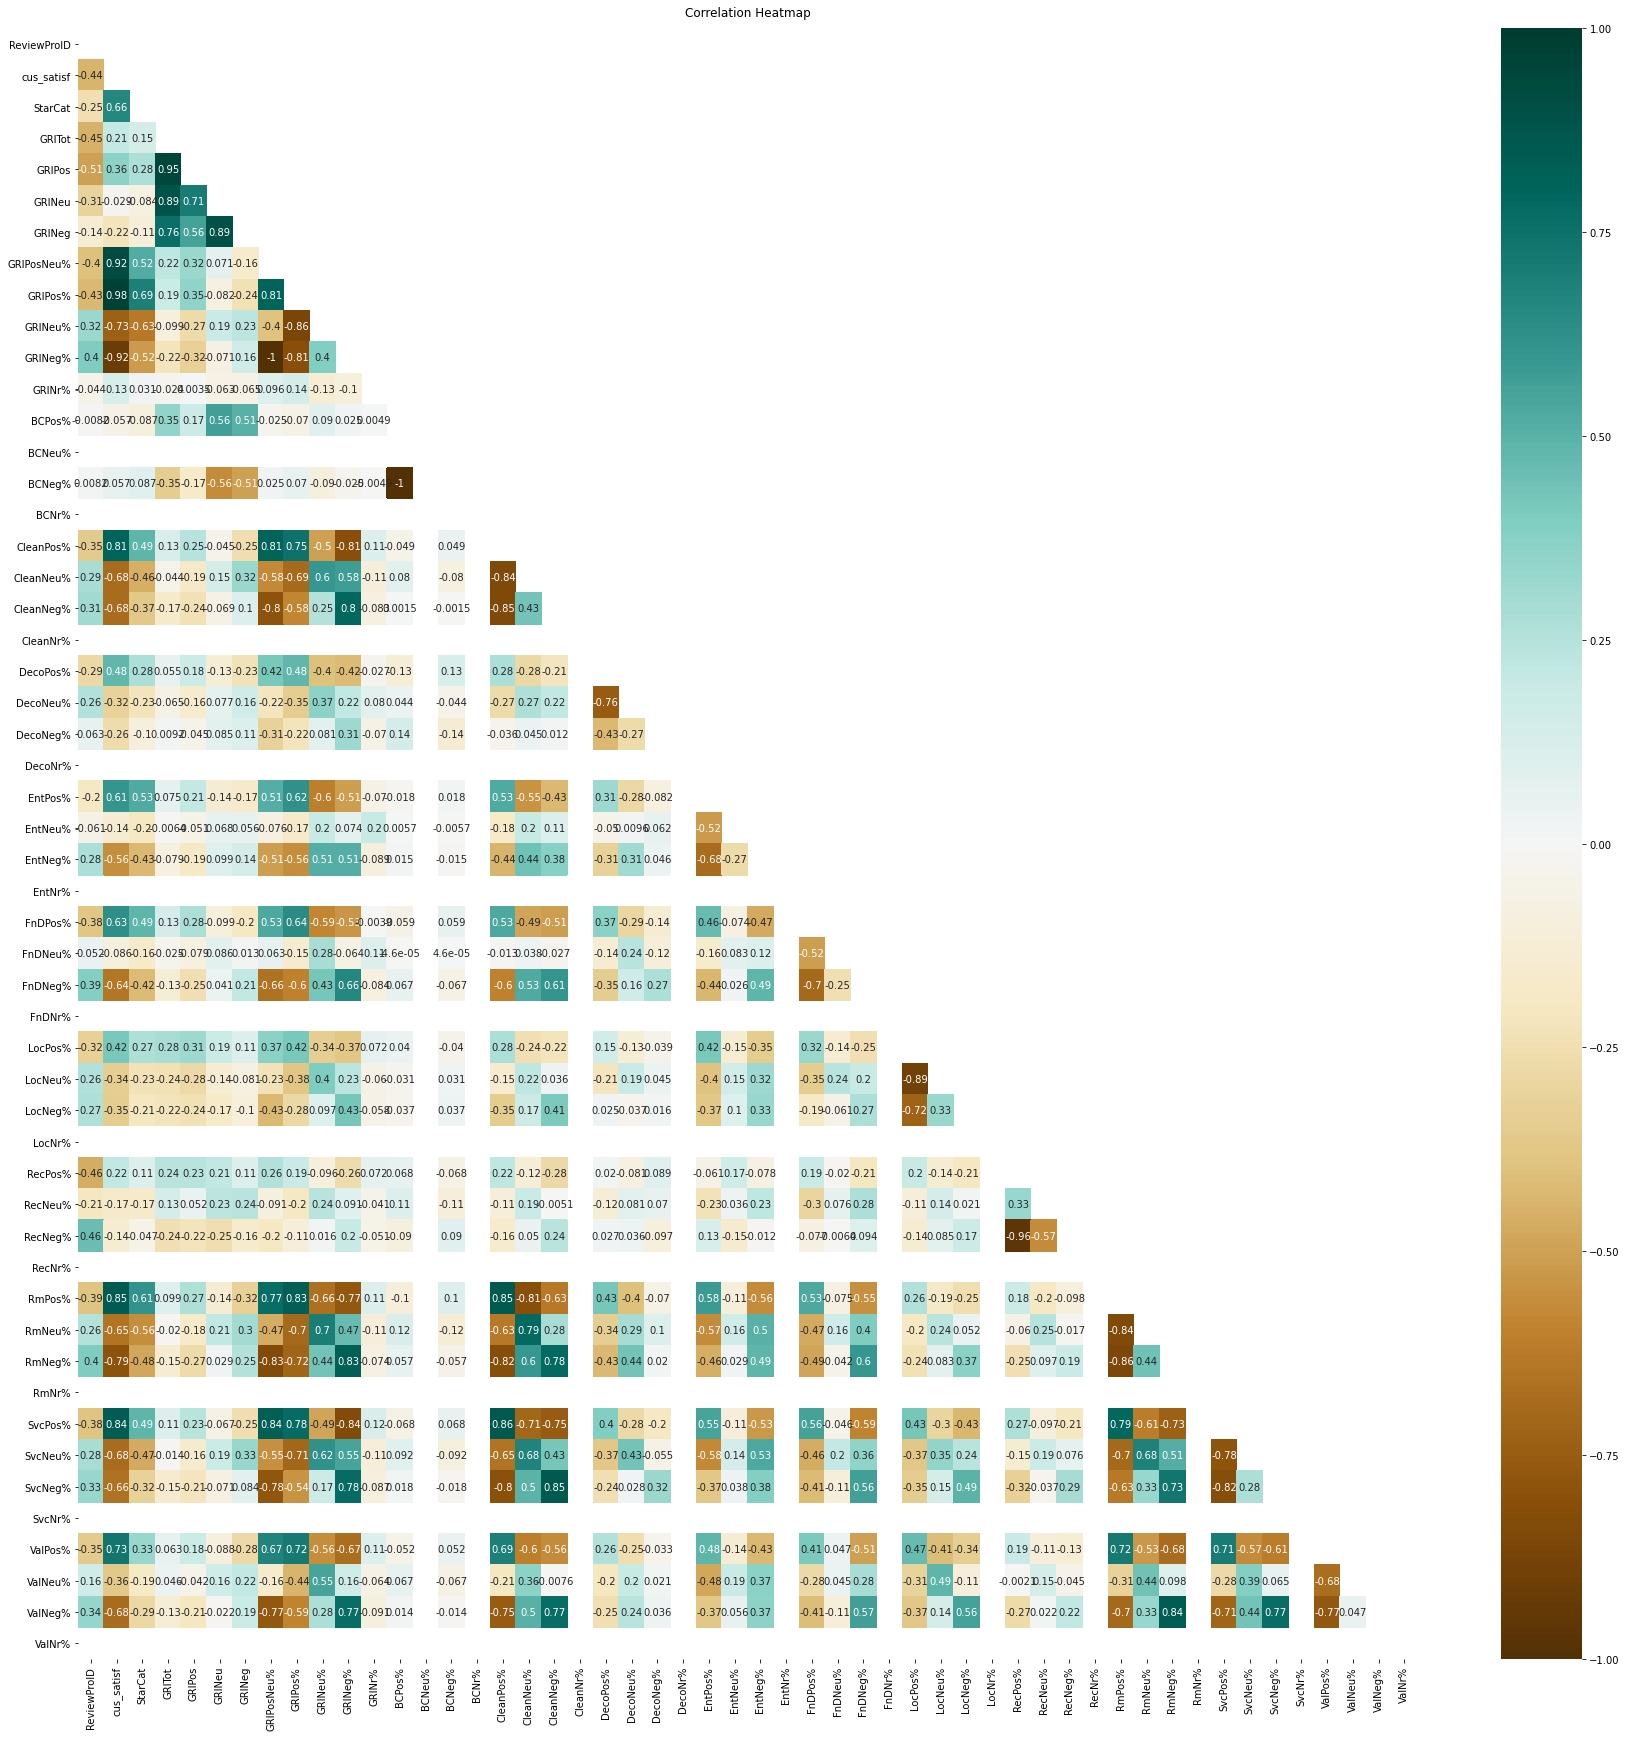

In [48]:
# triangle mask for heatmap to observe the correlation between every column and row 
mask1 = np.triu(np.ones_like(hotelSDR_A2_corr, dtype=np.bool))

# heatmap with triangle mask
plt.subplots(figsize=(30, 30))
heatmap2 = sns.heatmap(hotelSDR_A2_corr, mask=mask1, cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap2.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

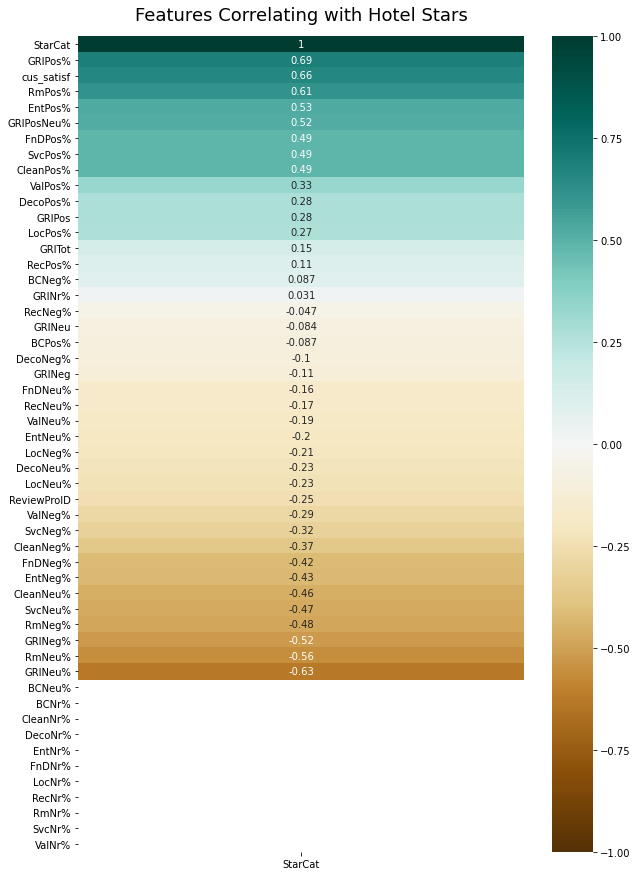

In [49]:
# Correlation with hotel stars
plt.figure(figsize=(10, 15))
heatmap2A = sns.heatmap(hotelSDR_A2_corr[['StarCat']].sort_values(by='StarCat', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2A.set_title('Features Correlating with Hotel Stars', fontdict={'fontsize':18}, pad=16);

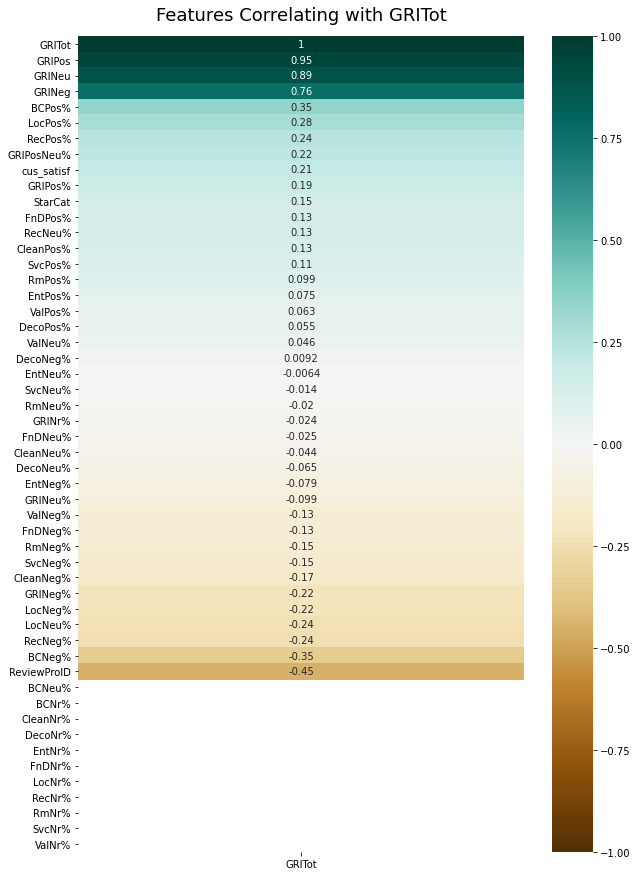

In [50]:
# Correlation with GRITot -- (but probably it's not making sense, because GRI is actually expressed as a %)
plt.figure(figsize=(10, 15))
heatmap2B = sns.heatmap(hotelSDR_A2_corr[['GRITot']].sort_values(by='GRITot', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2B.set_title('Features Correlating with GRITot', fontdict={'fontsize':18}, pad=16);

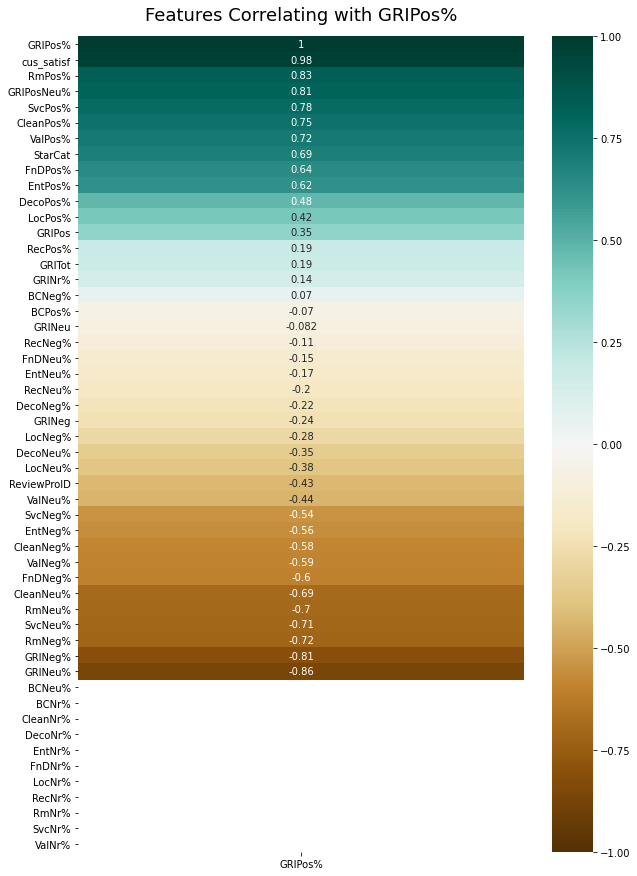

In [51]:
# Correlation with GRIPos%
plt.figure(figsize=(10, 15))
heatmap2C = sns.heatmap(hotelSDR_A2_corr[['GRIPos%']].sort_values(by='GRIPos%', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2C.set_title('Features Correlating with GRIPos%', fontdict={'fontsize':18}, pad=16);

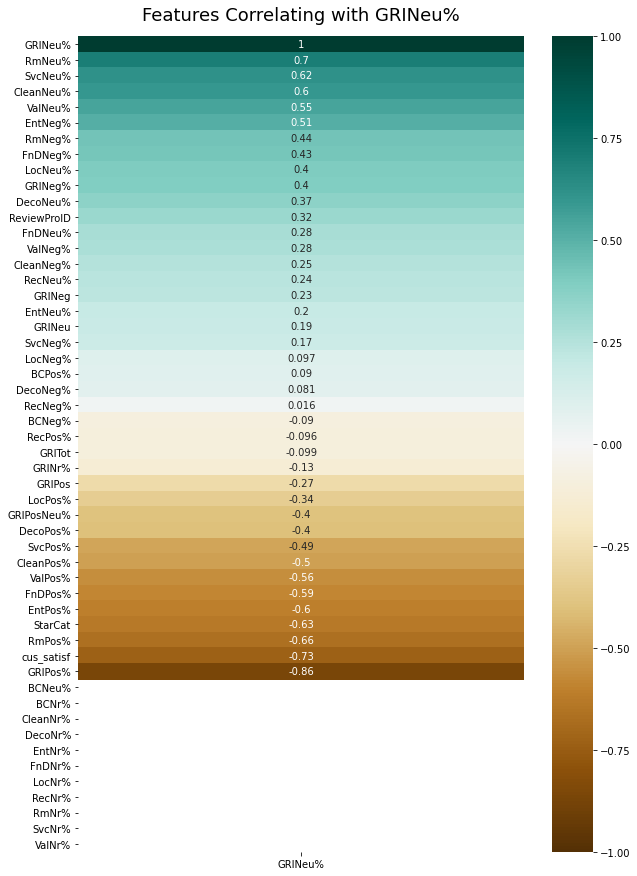

In [52]:
# Correlation with GRINeu%
plt.figure(figsize=(10, 15))
heatmap2D = sns.heatmap(hotelSDR_A2_corr[['GRINeu%']].sort_values(by='GRINeu%', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2D.set_title('Features Correlating with GRINeu%', fontdict={'fontsize':18}, pad=16);

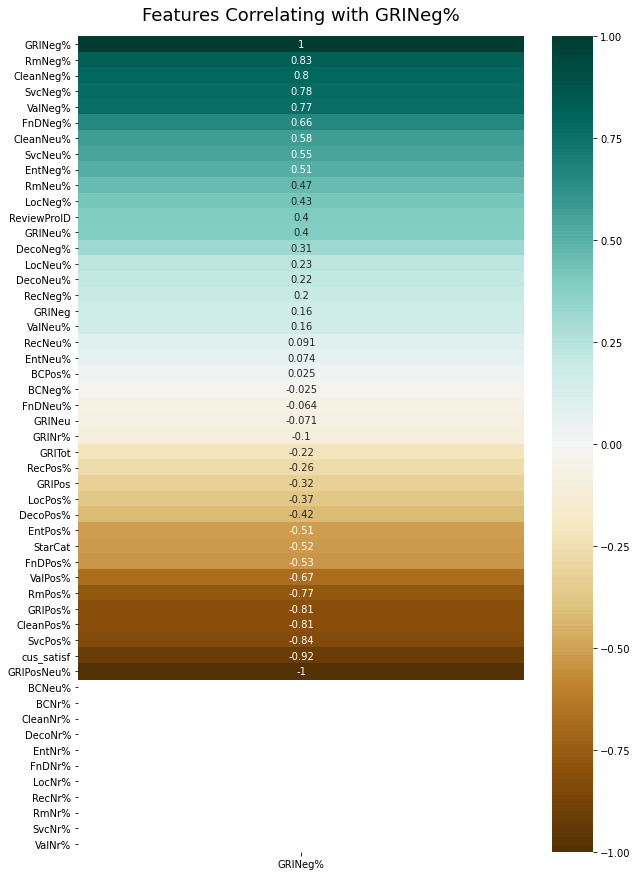

In [53]:
# Correlation with GRINeg%
plt.figure(figsize=(10, 15))
heatmap2E = sns.heatmap(hotelSDR_A2_corr[['GRINeg%']].sort_values(by='GRINeg%', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2E.set_title('Features Correlating with GRINeg%', fontdict={'fontsize':18}, pad=16);

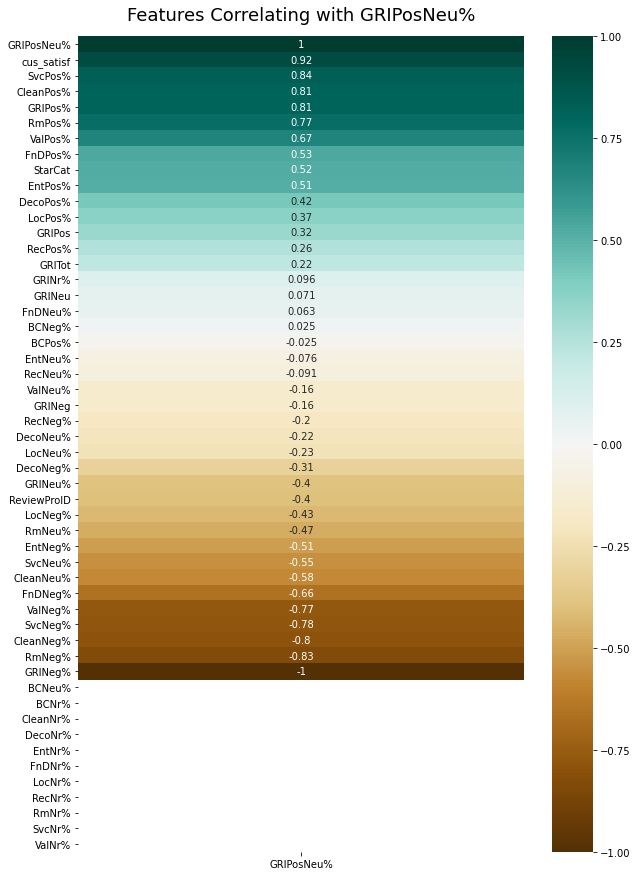

In [54]:
# Correlation with GRIPosNeu%
plt.figure(figsize=(10, 15))
heatmap2F = sns.heatmap(hotelSDR_A2_corr[['GRIPosNeu%']].sort_values(by='GRIPosNeu%', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap2F.set_title('Features Correlating with GRIPosNeu%', fontdict={'fontsize':18}, pad=16);

After several attempts, we selected relevant information and removed the GRI data. GRI is an index to gauge where the hotel ranks but does not specify which feature will improve customer satisfaction.

In [55]:
# Rearranging the columns for easy reference.
hotelSDR_A2 = hotelSDR_A2[['ReviewProID', 'HotelName', 'StarCat', 'cus_satisf', 'GRIPosNeu%','GRIPos%','GRINeg%','BCPos%', 'BCNeg%', 'CleanPos%',  'CleanNeg%', 'DecoPos%', 'DecoNeg%', 'EntPos%', 'EntNeg%', 'FnDPos%', 'FnDNeg%', 'LocPos%', 'LocNeg%',  'RecPos%', 'RecNeg%',  'RmPos%', 'RmNeg%', 'SvcPos%', 'SvcNeg%', 'ValPos%', 'ValNeg%', ]]

In [56]:
hotelSDR_A2.head()

,ReviewProID,HotelName,StarCat,cus_satisf,GRIPosNeu%,GRIPos%,GRINeg%,BCPos%,BCNeg%,CleanPos%,CleanNeg%,DecoPos%,DecoNeg%,EntPos%,EntNeg%,FnDPos%,FnDNeg%,LocPos%,LocNeg%,RecPos%,RecNeg%,RmPos%,RmNeg%,SvcPos%,SvcNeg%,ValPos%,ValNeg%
0,146727.0,8 on Claymore Serviced Residences,5,0.910714,0.964286,0.946429,0.035714,0.0,1.0,0.975610,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.926829,0.024390,0.951220,0.048780,0.926829,0.048780
1,121074.0,Amara Hotel,4,0.481509,0.912722,0.568787,0.087278,0.0,1.0,0.638037,0.141104,0.5,0.0,NaN,NaN,NaN,NaN,0.725926,0.037037,0.000000,1.000000,0.607143,0.095238,0.547619,0.190476,0.398496,0.218045
2,175340.0,Amara Sanctuary Resort Sentosa,5,0.275641,0.821225,0.454416,0.178775,0.0,1.0,0.631579,0.182825,0.5,0.5,NaN,NaN,0.5,0.25,0.730769,0.092949,0.013158,0.973684,0.536000,0.204000,0.642276,0.184282,0.367347,0.346939
3,144642.0,Amoy by Far East Hospitality,3,1.000000,1.000000,1.000000,0.000000,0.0,1.0,0.857143,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,0.809524,0.190476,0.000000,1.000000,0.857143,0.142857,0.857143,0.142857,0.714286,0.190476
4,144676.0,Aqueen Hotel Balestier,3,0.166667,0.849206,0.317460,0.150794,0.0,1.0,0.777778,0.031746,NaN,NaN,NaN,NaN,0.0,0.00,0.517241,0.120690,0.250000,0.562500,0.508197,0.098361,0.746032,0.031746,0.716981,0.056604


In [57]:
hotelSDR_A2.isnull().sum()

ReviewProID      0
HotelName        0
StarCat          0
cus_satisf       0
GRIPosNeu%       0
GRIPos%          0
GRINeg%          0
BCPos%           5
BCNeg%           5
CleanPos%        2
CleanNeg%        2
DecoPos%       112
DecoNeg%       112
EntPos%         83
EntNeg%         83
FnDPos%         59
FnDNeg%         59
LocPos%          2
LocNeg%          2
RecPos%          4
RecNeg%          4
RmPos%           2
RmNeg%           2
SvcPos%          1
SvcNeg%          1
ValPos%          3
ValNeg%          3
dtype: int64

In [58]:
# Filling in the null values with the respective column mean - Check 1
hotelSDR_A2['DecoPos%'].fillna(hotelSDR_A2['DecoPos%'].mean(),inplace=True) 

In [59]:
# Filling in the null values with the respective column mean - Check 2
hotelSDR_A2['DecoNeg%'].fillna(hotelSDR_A2['DecoNeg%'].mean(),inplace=True) 

In [60]:
# Checking the sum of null values 
hotelSDR_A2.isnull().sum()

ReviewProID     0
HotelName       0
StarCat         0
cus_satisf      0
GRIPosNeu%      0
GRIPos%         0
GRINeg%         0
BCPos%          5
BCNeg%          5
CleanPos%       2
CleanNeg%       2
DecoPos%        0
DecoNeg%        0
EntPos%        83
EntNeg%        83
FnDPos%        59
FnDNeg%        59
LocPos%         2
LocNeg%         2
RecPos%         4
RecNeg%         4
RmPos%          2
RmNeg%          2
SvcPos%         1
SvcNeg%         1
ValPos%         3
ValNeg%         3
dtype: int64

In [61]:
# Filling in the null values with the respective column mean - To proceed with the remaining columns
hotelSDR_A2['BCPos%'].fillna(hotelSDR_A2['BCPos%'].mean(),inplace=True) 
hotelSDR_A2['BCNeg%'].fillna(hotelSDR_A2['BCNeg%'].mean(),inplace=True)
hotelSDR_A2['CleanPos%'].fillna(hotelSDR_A2['CleanPos%'].mean(),inplace=True)
hotelSDR_A2['CleanNeg%'].fillna(hotelSDR_A2['CleanNeg%'].mean(),inplace=True)
hotelSDR_A2['EntPos%'].fillna(hotelSDR_A2['EntPos%'].mean(),inplace=True) 
hotelSDR_A2['EntNeg%'].fillna(hotelSDR_A2['EntNeg%'].mean(),inplace=True)
hotelSDR_A2['FnDPos%'].fillna(hotelSDR_A2['FnDPos%'].mean(),inplace=True)
hotelSDR_A2['FnDNeg%'].fillna(hotelSDR_A2['FnDNeg%'].mean(),inplace=True) 
hotelSDR_A2['LocNeg%'].fillna(hotelSDR_A2['LocNeg%'].mean(),inplace=True)
hotelSDR_A2['RecPos%'].fillna(hotelSDR_A2['RecPos%'].mean(),inplace=True)
hotelSDR_A2['RecNeg%'].fillna(hotelSDR_A2['RecNeg%'].mean(),inplace=True)
hotelSDR_A2['RmPos%'].fillna(hotelSDR_A2['RmPos%'].mean(),inplace=True)
hotelSDR_A2['RmNeg%'].fillna(hotelSDR_A2['RmNeg%'].mean(),inplace=True)
hotelSDR_A2['SvcPos%'].fillna(hotelSDR_A2['SvcPos%'].mean(),inplace=True)
hotelSDR_A2['SvcNeg%'].fillna(hotelSDR_A2['SvcNeg%'].mean(),inplace=True)
hotelSDR_A2['ValNeg%'].fillna(hotelSDR_A2['ValNeg%'].mean(),inplace=True)
hotelSDR_A2['ValPos%'].fillna(hotelSDR_A2['ValPos%'].mean(),inplace=True)
hotelSDR_A2['LocPos%'].fillna(hotelSDR_A2['LocPos%'].mean(),inplace=True)

In [62]:
# Checking the sum of null values 
hotelSDR_A2.isnull().sum()

ReviewProID    0
HotelName      0
StarCat        0
cus_satisf     0
GRIPosNeu%     0
GRIPos%        0
GRINeg%        0
BCPos%         0
BCNeg%         0
CleanPos%      0
CleanNeg%      0
DecoPos%       0
DecoNeg%       0
EntPos%        0
EntNeg%        0
FnDPos%        0
FnDNeg%        0
LocPos%        0
LocNeg%        0
RecPos%        0
RecNeg%        0
RmPos%         0
RmNeg%         0
SvcPos%        0
SvcNeg%        0
ValPos%        0
ValNeg%        0
dtype: int64

In [63]:
hotelSDR_A2.describe(include='all')

,ReviewProID,HotelName,StarCat,cus_satisf,GRIPosNeu%,GRIPos%,GRINeg%,BCPos%,BCNeg%,CleanPos%,CleanNeg%,DecoPos%,DecoNeg%,EntPos%,EntNeg%,FnDPos%,FnDNeg%,LocPos%,LocNeg%,RecPos%,RecNeg%,RmPos%,RmNeg%,SvcPos%,SvcNeg%,ValPos%,ValNeg%
count,189.000000,189,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
unique,NaN,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer View Hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,147446.201058,NaN,3.851852,0.432143,0.869616,0.562437,0.130293,0.000058,0.999942,0.770330,0.100392,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,0.769792,0.078508,0.109992,0.869377,0.640174,0.149005,0.701453,0.130371,0.598372,0.164267
std,23233.513981,NaN,0.743238,0.306685,0.113854,0.207382,0.113912,0.000782,0.000782,0.174485,0.103915,0.236082,0.160740,0.278887,0.247420,0.293789,0.259955,0.192732,0.092642,0.124010,0.142395,0.227888,0.136831,0.187929,0.121418,0.171648,0.126289
min,108010.000000,NaN,3.000000,-0.603448,0.293103,0.103448,0.000000,0.000000,0.989247,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133480.000000,NaN,3.000000,0.211538,0.828571,0.390083,0.053963,0.000000,1.000000,0.682836,0.040541,0.570279,0.000000,0.567776,0.000000,0.500000,0.000000,0.684211,0.025806,0.000000,0.802083,0.487310,0.057851,0.600000,0.060294,0.500000,0.083447
50%,144559.000000,NaN,4.000000,0.482168,0.904762,0.567240,0.095238,0.000000,1.000000,0.816832,0.061969,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,0.833333,0.050909,0.090909,0.900000,0.686170,0.105263,0.740000,0.093220,0.621622,0.125000
75%,175338.000000,NaN,4.000000,0.678453,0.946037,0.742708,0.171429,0.000000,1.000000,0.900415,0.130137,0.570279,0.122928,0.700000,0.198831,0.750000,0.215719,0.913924,0.098182,0.157895,1.000000,0.822089,0.182320,0.845316,0.153333,0.716981,0.204819


In [64]:
# Finding correlation in the revised hotelSDR_A2
hotelSDR_A3_corr = hotelSDR_A2.corr() 
hotelSDR_A3_corr

,ReviewProID,StarCat,cus_satisf,GRIPosNeu%,GRIPos%,GRINeg%,BCPos%,BCNeg%,CleanPos%,CleanNeg%,DecoPos%,DecoNeg%,EntPos%,EntNeg%,FnDPos%,FnDNeg%,LocPos%,LocNeg%,RecPos%,RecNeg%,RmPos%,RmNeg%,SvcPos%,SvcNeg%,ValPos%,ValNeg%
ReviewProID,1.000000,-0.246343,-0.440437,-0.404369,-0.429210,0.404392,-0.008126,0.008126,-0.349467,0.305886,-0.192602,0.042555,-0.136364,0.189767,-0.298937,0.304254,-0.318620,0.271054,-0.457731,0.457120,-0.384707,0.397652,-0.382209,0.328283,-0.351390,0.339942
StarCat,-0.246343,1.000000,0.659726,0.518017,0.691148,-0.517912,-0.085027,0.085027,0.484242,-0.363400,0.171759,-0.061222,0.371835,-0.298214,0.401045,-0.341318,0.266836,-0.203685,0.106338,-0.046465,0.605429,-0.478404,0.488349,-0.315291,0.327391,-0.283130
cus_satisf,-0.440437,0.659726,1.000000,0.916126,0.975513,-0.916334,-0.053305,0.053305,0.771902,-0.654276,0.261259,-0.144671,0.368438,-0.340150,0.465517,-0.473514,0.402114,-0.334133,0.205406,-0.133838,0.814420,-0.759181,0.828710,-0.651723,0.699386,-0.649838
GRIPosNeu%,-0.404369,0.518017,0.916126,1.000000,0.805527,-0.999986,-0.021045,0.021045,0.748446,-0.734687,0.224300,-0.168739,0.250351,-0.250511,0.362395,-0.445185,0.344289,-0.393881,0.221549,-0.171030,0.711506,-0.770155,0.831721,-0.776799,0.620365,-0.714012
GRIPos%,-0.429210,0.691148,0.975513,0.805527,1.000000,-0.805826,-0.067289,0.067289,0.730297,-0.563987,0.263265,-0.121192,0.407576,-0.365295,0.489481,-0.455605,0.405441,-0.277722,0.181925,-0.103882,0.813476,-0.699678,0.768563,-0.537080,0.693386,-0.568751
GRINeg%,0.404392,-0.517912,-0.916334,-0.999986,-0.805826,1.000000,0.021009,-0.021009,-0.748651,0.734742,-0.224102,0.168861,-0.249935,0.250750,-0.362188,0.445393,-0.344488,0.393980,-0.221811,0.171210,-0.711692,0.770146,-0.831932,0.776852,-0.620614,0.714122
BCPos%,-0.008126,-0.085027,-0.053305,-0.021045,-0.067289,0.021009,1.000000,-1.000000,-0.047057,0.001290,-0.125988,0.123172,-0.017773,0.015124,-0.057930,0.065215,0.039351,-0.034737,0.057642,-0.080484,-0.102891,0.053583,-0.063419,0.014282,-0.051488,0.013243
BCNeg%,0.008126,0.085027,0.053305,0.021045,0.067289,-0.021009,-1.000000,1.000000,0.047057,-0.001290,0.125988,-0.123172,0.017773,-0.015124,0.057930,-0.065215,-0.039351,0.034737,-0.057642,0.080484,0.102891,-0.053583,0.063419,-0.014282,0.051488,-0.013243
CleanPos%,-0.349467,0.484242,0.771902,0.748446,0.730297,-0.748651,-0.047057,0.047057,1.000000,-0.849633,0.119199,-0.018291,0.290441,-0.244041,0.352572,-0.391826,0.276719,-0.346745,0.215761,-0.157287,0.851712,-0.815260,0.829402,-0.679491,0.685353,-0.749892
CleanNeg%,0.305886,-0.363400,-0.654276,-0.734687,-0.563987,0.734742,0.001290,-0.001290,-0.849633,1.000000,-0.064451,0.009226,-0.171980,0.154605,-0.243836,0.287308,-0.224453,0.412022,-0.245717,0.215267,-0.632130,0.782541,-0.724730,0.725582,-0.561165,0.769319


Text(0.5, 1.0, 'Correlation Heatmap')

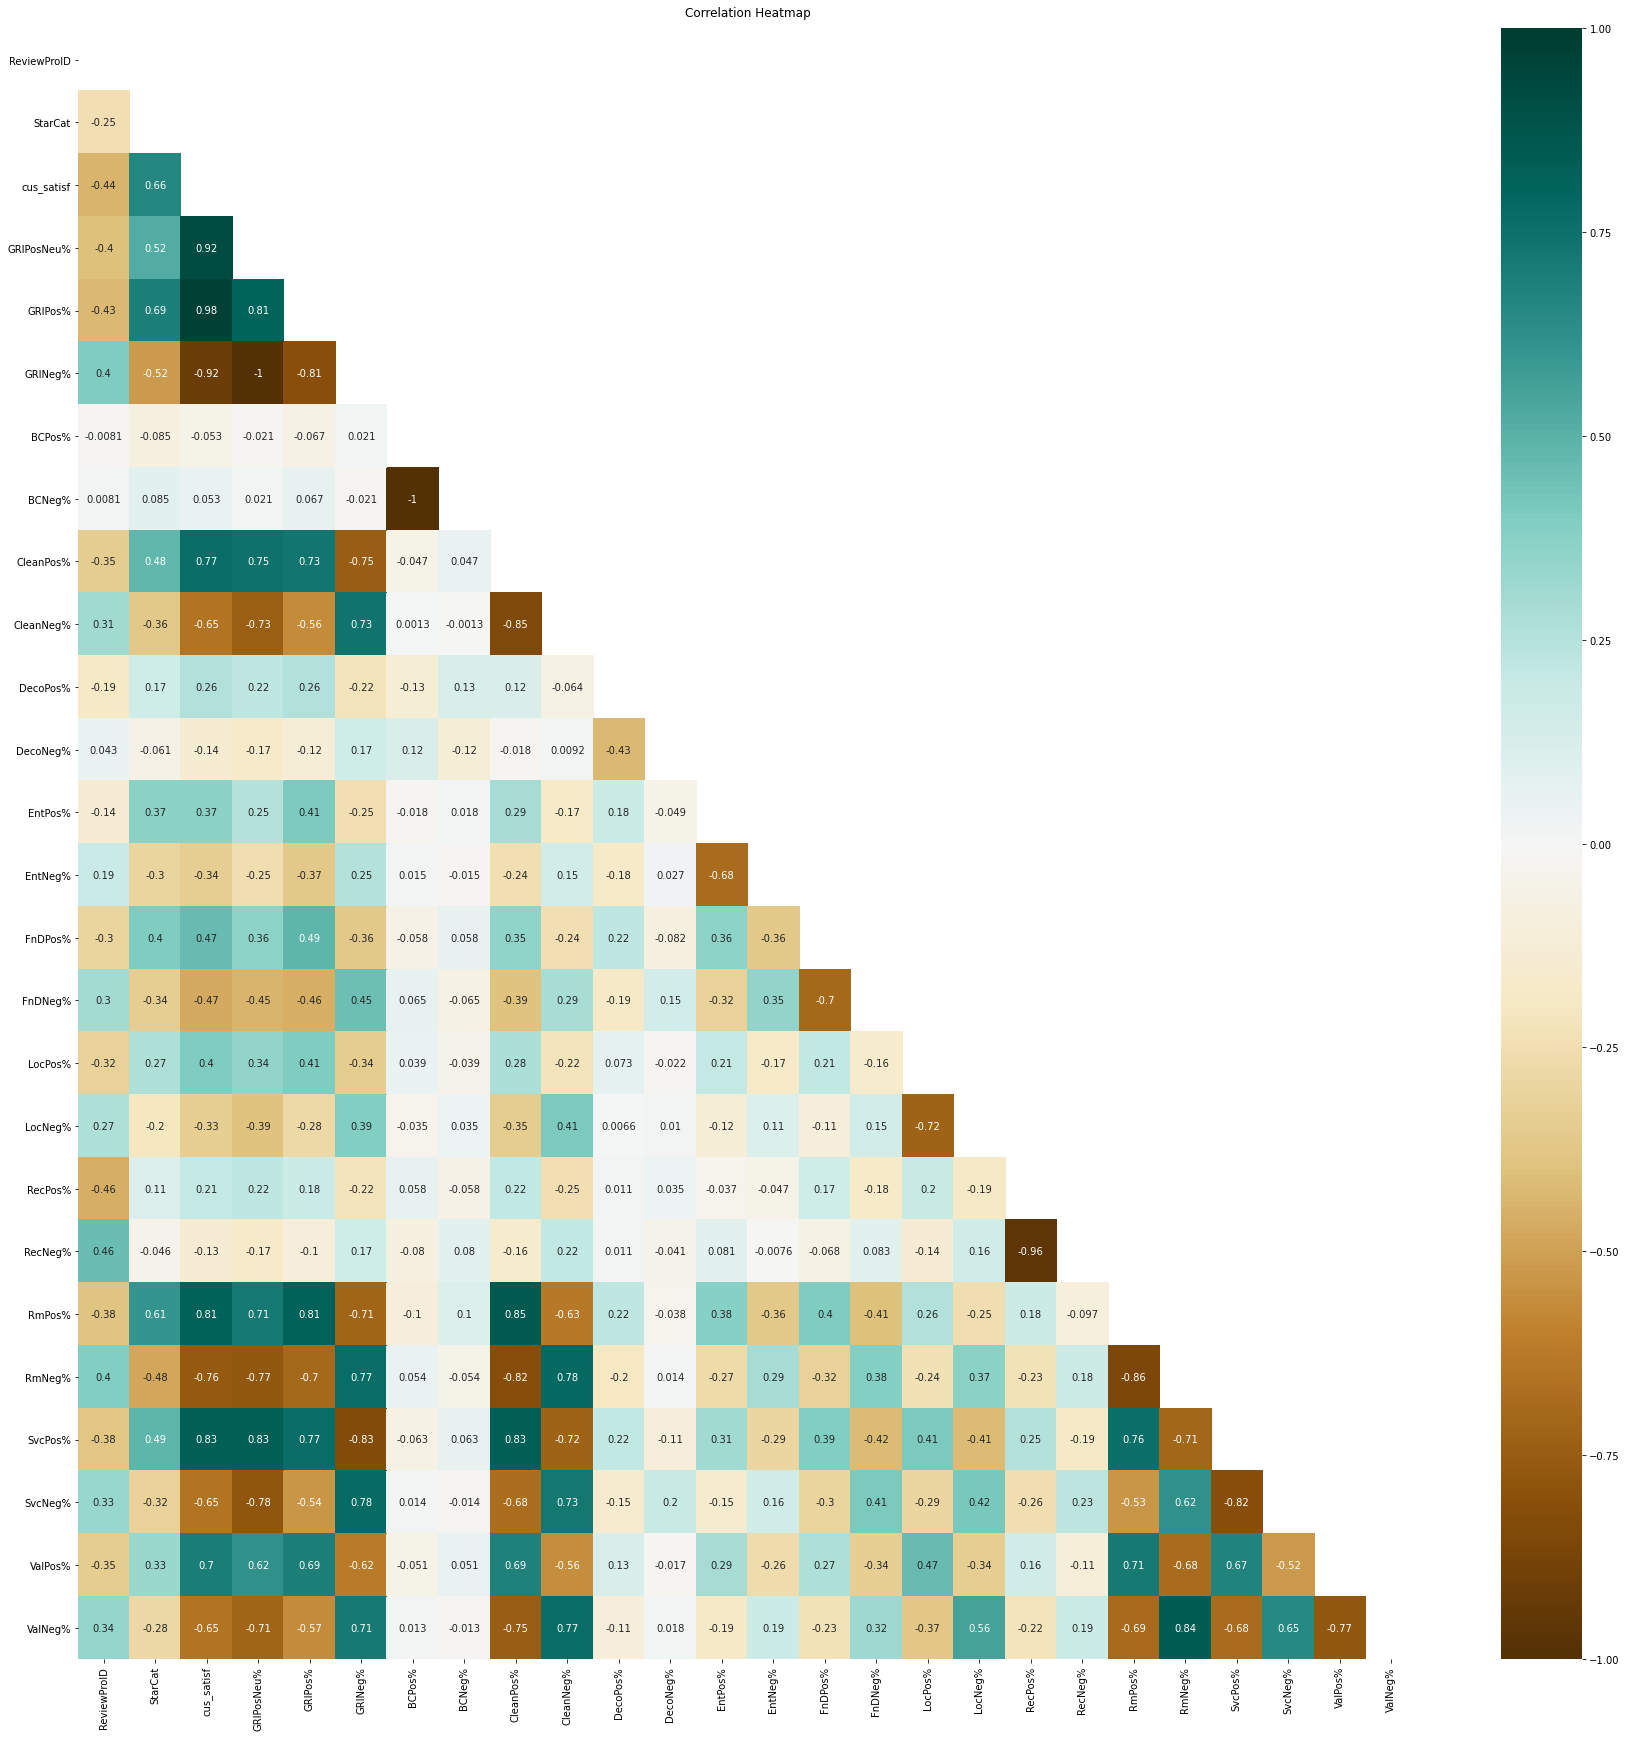

In [65]:
# triangle mask for heatmap
mask2 = np.triu(np.ones_like(hotelSDR_A3_corr, dtype=np.bool))

# heatmap with triangle mask
plt.subplots(figsize=(30, 30))
heatmap3 = sns.heatmap(hotelSDR_A3_corr, mask=mask2, cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap3.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

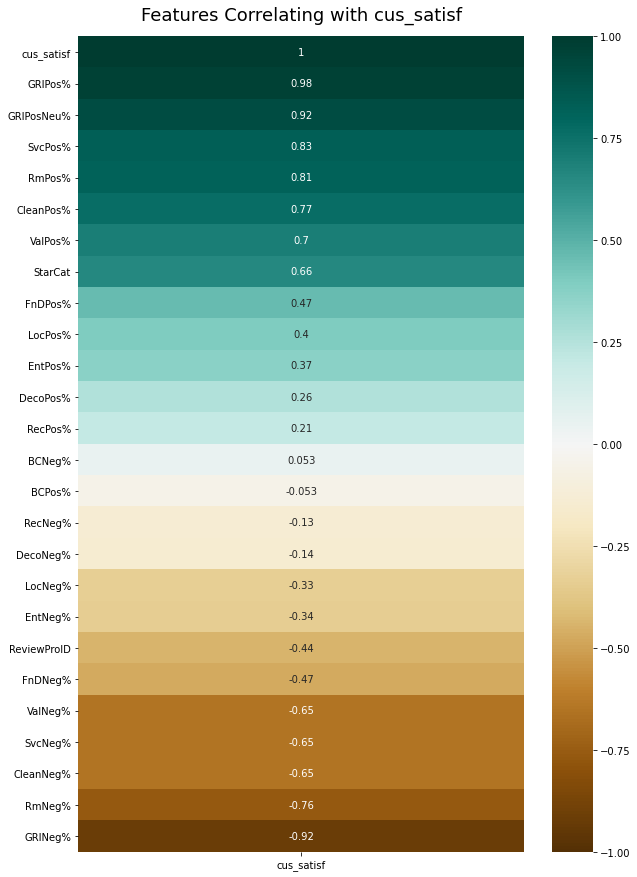

In [66]:
# Corr with cus_satisf
plt.figure(figsize=(10, 15))
heatmap3A = sns.heatmap(hotelSDR_A3_corr[['cus_satisf']].sort_values(by='cus_satisf', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap3A.set_title('Features Correlating with cus_satisf', fontdict={'fontsize':18}, pad=16);

In [67]:
from scipy.stats import pearsonr
stat, p = pearsonr(hotelSDR_A2['cus_satisf'], hotelSDR_A2['LocPos%'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('This feature is Significantly independent to Customer Satisfaction.')
else:
	print('This feature is Significantly dependent to Customer Satisfaction.')

stat=0.402, p=0.000
This feature is Significantly dependent to Customer Satisfaction.


In [68]:
from scipy.stats import pearsonr
stat, p = pearsonr(hotelSDR_A2['cus_satisf'], hotelSDR_A2['LocNeg%'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('This feature is Significantly independent to Customer Satisfaction.')
else:
	print('This feature is Significantly dependent to Customer Satisfaction.')

stat=-0.334, p=0.000
This feature is Significantly dependent to Customer Satisfaction.


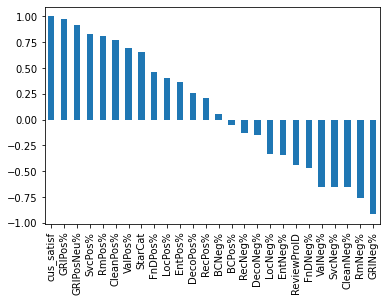

In [69]:
# An overview of all features that has correlation to Customer Satisfaction
hotelSDR_A3_corr['cus_satisf'].sort_values(ascending=False).plot(kind='bar')

In [70]:
#Carrying out the ANOVA test for RmPos% and StarCat 
import statsmodels.api as sm
from statsmodels.formula.api import ols

RmPos = hotelSDR_A2[['RmPos%']]
model = ols('RmPos ~ C(StarCat)', data=hotelSDR_A2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(StarCat),3.688403,2.0,56.464218,6.869916e-20
Residual,6.075025,186.0,NaN,NaN


In [71]:
#ETA_sq & Omega_sq after ANOVA test 
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov
anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(StarCat),3.688403,2.0,1.844202,56.464218,6.869916e-20,0.377777,0.36985
Residual,6.075025,186.0,0.032661,NaN,NaN,NaN,NaN


In [72]:
#Post-Hoc Test 
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(hotelSDR_A2['RmPos%'], hotelSDR_A2['StarCat'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
3,4,0.2293,0.001,0.1591,0.2996,True
3,5,0.3598,0.001,0.2748,0.4449,True
4,5,0.1305,0.001,0.048,0.213,True


In [73]:
#Bonferroni Correction 
import scipy.stats as stats
import statsmodels.stats.multicomp as mc


comp = mc.MultiComparison(hotelSDR_A2['RmPos%'], hotelSDR_A2['StarCat'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
3,4,-7.1893,0.0,0.0,True
3,5,-9.4397,0.0,0.0,True
4,5,-4.4499,0.0,0.0001,True


In [74]:
np.mean(hotelSDR_A2['RmPos%'])

0.6401739976971572

In [75]:
#Carrying out one sample z-test -- the result seems weird. 
from scipy import stats
from statsmodels.stats import weightstats as stests 

ztest ,pval = stests.ztest(hotelSDR_A2['RmPos%'], x2=None, value=0.633399669679198)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.6827803846558199
accept null hypothesis


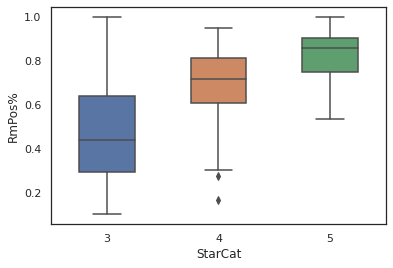

In [76]:
# Relationship between Positive Room Reviews vs the Hotel's Star Category 
sns.set_theme(style="white")
sns.boxplot(x='StarCat', y='RmPos%', width=0.5, data=hotelSDR_A2)

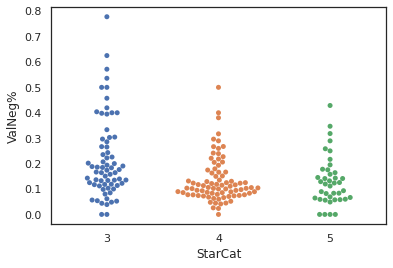

In [77]:
# Relationship between Negative Room Reviews vs the Hotel's Star Category 
sns.swarmplot(x='StarCat', y='ValNeg%', data=hotelSDR_A2)

In [78]:
#Carrying out ANOVA test for ValNeg% & StarCat  
 
import statsmodels.api as sm
from statsmodels.formula.api import ols

ValNeg = hotelSDR_A2[['ValNeg%']]
model = ols('ValNeg ~ C(StarCat)', data=hotelSDR_A2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(StarCat),0.312702,2.0,10.828296,0.000036
Residual,2.685672,186.0,NaN,NaN


In [79]:
#ETA_sq & Omega_sq after ANOVA test 
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(StarCat),0.312702,2.0,0.156351,10.828296,0.000036,0.10429,0.094205
Residual,2.685672,186.0,0.014439,NaN,NaN,NaN,NaN


In [80]:
#Post-Hoc Test 
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(hotelSDR_A2['ValNeg%'], hotelSDR_A2['StarCat'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary() 

group1,group2,meandiff,p-adj,lower,upper,reject
3,4,-0.0836,0.001,-0.1303,-0.0369,True
3,5,-0.0869,0.0011,-0.1435,-0.0304,True
4,5,-0.0033,0.9,-0.0582,0.0515,False


In [81]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(hotelSDR_A2['ValNeg%'], hotelSDR_A2['StarCat'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
3,4,4.0492,0.0001,0.0002,True
3,5,3.1363,0.0022,0.0066,True
4,5,0.1877,0.8515,1.0,False


## (c) Analysis - 3

In [82]:
# Grouping the Data by StarCat to determine which is the leading factor for customer satisfaction & what hoteliers should focus on. 
hotelSDR_A3 = hotelSDR_A2.copy(deep=True)
hotelSDR_A3

,ReviewProID,HotelName,StarCat,cus_satisf,GRIPosNeu%,GRIPos%,GRINeg%,BCPos%,BCNeg%,CleanPos%,CleanNeg%,DecoPos%,DecoNeg%,EntPos%,EntNeg%,FnDPos%,FnDNeg%,LocPos%,LocNeg%,RecPos%,RecNeg%,RmPos%,RmNeg%,SvcPos%,SvcNeg%,ValPos%,ValNeg%
0,146727.0,8 on Claymore Serviced Residences,5,0.910714,0.964286,0.946429,0.035714,0.0,1.0,0.975610,0.000000,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,1.000000,0.000000,0.000000,1.000000,0.926829,0.024390,0.951220,0.048780,0.926829,0.048780
1,121074.0,Amara Hotel,4,0.481509,0.912722,0.568787,0.087278,0.0,1.0,0.638037,0.141104,0.500000,0.000000,0.567776,0.198831,0.565345,0.215719,0.725926,0.037037,0.000000,1.000000,0.607143,0.095238,0.547619,0.190476,0.398496,0.218045
2,175340.0,Amara Sanctuary Resort Sentosa,5,0.275641,0.821225,0.454416,0.178775,0.0,1.0,0.631579,0.182825,0.500000,0.500000,0.567776,0.198831,0.500000,0.250000,0.730769,0.092949,0.013158,0.973684,0.536000,0.204000,0.642276,0.184282,0.367347,0.346939
3,144642.0,Amoy by Far East Hospitality,3,1.000000,1.000000,1.000000,0.000000,0.0,1.0,0.857143,0.142857,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,0.809524,0.190476,0.000000,1.000000,0.857143,0.142857,0.857143,0.142857,0.714286,0.190476
4,144676.0,Aqueen Hotel Balestier,3,0.166667,0.849206,0.317460,0.150794,0.0,1.0,0.777778,0.031746,0.570279,0.122928,0.567776,0.198831,0.000000,0.000000,0.517241,0.120690,0.250000,0.562500,0.508197,0.098361,0.746032,0.031746,0.716981,0.056604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,144587.0,Wanderlust,3,0.627615,0.930962,0.692469,0.064854,0.0,1.0,0.925466,0.024845,0.570279,0.122928,0.000000,0.000000,1.000000,0.000000,0.757576,0.068182,0.346154,0.653846,0.716049,0.141975,0.858896,0.042945,0.682540,0.103175
186,144181.0,Wangz Hotel,4,0.780606,0.983030,0.797576,0.016970,0.0,1.0,0.937729,0.021978,0.570279,0.122928,0.000000,0.000000,0.666667,0.111111,0.716814,0.048673,0.191489,0.787234,0.934066,0.025641,0.945255,0.025547,0.853211,0.041284
187,144280.0,W Singapore Sentosa Cove,5,0.715372,0.927213,0.788159,0.072787,0.0,1.0,0.913140,0.040089,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.661616,0.121212,0.093333,0.866667,0.863208,0.058962,0.745055,0.151648,0.614958,0.141274
188,144516.0,York Hotel Singapore,4,0.361967,0.884479,0.477488,0.115521,0.0,1.0,0.718861,0.064057,0.500000,0.000000,0.285714,0.428571,0.611111,0.222222,0.826990,0.027682,0.309524,0.642857,0.691729,0.082707,0.613559,0.108475,0.644628,0.095041


In [83]:
# Drop the ReviewProID & HotelName (irrelevant for our test for StarCat)
hotelSDR_A3.drop(hotelSDR_A3.columns[0:2], axis=1, inplace=True)

In [84]:
hotelSDR_A3

,StarCat,cus_satisf,GRIPosNeu%,GRIPos%,GRINeg%,BCPos%,BCNeg%,CleanPos%,CleanNeg%,DecoPos%,DecoNeg%,EntPos%,EntNeg%,FnDPos%,FnDNeg%,LocPos%,LocNeg%,RecPos%,RecNeg%,RmPos%,RmNeg%,SvcPos%,SvcNeg%,ValPos%,ValNeg%
0,5,0.910714,0.964286,0.946429,0.035714,0.0,1.0,0.975610,0.000000,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,1.000000,0.000000,0.000000,1.000000,0.926829,0.024390,0.951220,0.048780,0.926829,0.048780
1,4,0.481509,0.912722,0.568787,0.087278,0.0,1.0,0.638037,0.141104,0.500000,0.000000,0.567776,0.198831,0.565345,0.215719,0.725926,0.037037,0.000000,1.000000,0.607143,0.095238,0.547619,0.190476,0.398496,0.218045
2,5,0.275641,0.821225,0.454416,0.178775,0.0,1.0,0.631579,0.182825,0.500000,0.500000,0.567776,0.198831,0.500000,0.250000,0.730769,0.092949,0.013158,0.973684,0.536000,0.204000,0.642276,0.184282,0.367347,0.346939
3,3,1.000000,1.000000,1.000000,0.000000,0.0,1.0,0.857143,0.142857,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,0.809524,0.190476,0.000000,1.000000,0.857143,0.142857,0.857143,0.142857,0.714286,0.190476
4,3,0.166667,0.849206,0.317460,0.150794,0.0,1.0,0.777778,0.031746,0.570279,0.122928,0.567776,0.198831,0.000000,0.000000,0.517241,0.120690,0.250000,0.562500,0.508197,0.098361,0.746032,0.031746,0.716981,0.056604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,3,0.627615,0.930962,0.692469,0.064854,0.0,1.0,0.925466,0.024845,0.570279,0.122928,0.000000,0.000000,1.000000,0.000000,0.757576,0.068182,0.346154,0.653846,0.716049,0.141975,0.858896,0.042945,0.682540,0.103175
186,4,0.780606,0.983030,0.797576,0.016970,0.0,1.0,0.937729,0.021978,0.570279,0.122928,0.000000,0.000000,0.666667,0.111111,0.716814,0.048673,0.191489,0.787234,0.934066,0.025641,0.945255,0.025547,0.853211,0.041284
187,5,0.715372,0.927213,0.788159,0.072787,0.0,1.0,0.913140,0.040089,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.661616,0.121212,0.093333,0.866667,0.863208,0.058962,0.745055,0.151648,0.614958,0.141274
188,4,0.361967,0.884479,0.477488,0.115521,0.0,1.0,0.718861,0.064057,0.500000,0.000000,0.285714,0.428571,0.611111,0.222222,0.826990,0.027682,0.309524,0.642857,0.691729,0.082707,0.613559,0.108475,0.644628,0.095041


In [85]:
# Drop all the GRI columns
hotelSDR_A3.drop(hotelSDR_A3.columns[2:5], axis=1, inplace=True)

In [86]:
hotelSDR_A3

,StarCat,cus_satisf,BCPos%,BCNeg%,CleanPos%,CleanNeg%,DecoPos%,DecoNeg%,EntPos%,EntNeg%,FnDPos%,FnDNeg%,LocPos%,LocNeg%,RecPos%,RecNeg%,RmPos%,RmNeg%,SvcPos%,SvcNeg%,ValPos%,ValNeg%
0,5,0.910714,0.0,1.0,0.975610,0.000000,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,1.000000,0.000000,0.000000,1.000000,0.926829,0.024390,0.951220,0.048780,0.926829,0.048780
1,4,0.481509,0.0,1.0,0.638037,0.141104,0.500000,0.000000,0.567776,0.198831,0.565345,0.215719,0.725926,0.037037,0.000000,1.000000,0.607143,0.095238,0.547619,0.190476,0.398496,0.218045
2,5,0.275641,0.0,1.0,0.631579,0.182825,0.500000,0.500000,0.567776,0.198831,0.500000,0.250000,0.730769,0.092949,0.013158,0.973684,0.536000,0.204000,0.642276,0.184282,0.367347,0.346939
3,3,1.000000,0.0,1.0,0.857143,0.142857,0.570279,0.122928,0.567776,0.198831,0.565345,0.215719,0.809524,0.190476,0.000000,1.000000,0.857143,0.142857,0.857143,0.142857,0.714286,0.190476
4,3,0.166667,0.0,1.0,0.777778,0.031746,0.570279,0.122928,0.567776,0.198831,0.000000,0.000000,0.517241,0.120690,0.250000,0.562500,0.508197,0.098361,0.746032,0.031746,0.716981,0.056604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,3,0.627615,0.0,1.0,0.925466,0.024845,0.570279,0.122928,0.000000,0.000000,1.000000,0.000000,0.757576,0.068182,0.346154,0.653846,0.716049,0.141975,0.858896,0.042945,0.682540,0.103175
186,4,0.780606,0.0,1.0,0.937729,0.021978,0.570279,0.122928,0.000000,0.000000,0.666667,0.111111,0.716814,0.048673,0.191489,0.787234,0.934066,0.025641,0.945255,0.025547,0.853211,0.041284
187,5,0.715372,0.0,1.0,0.913140,0.040089,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.661616,0.121212,0.093333,0.866667,0.863208,0.058962,0.745055,0.151648,0.614958,0.141274
188,4,0.361967,0.0,1.0,0.718861,0.064057,0.500000,0.000000,0.285714,0.428571,0.611111,0.222222,0.826990,0.027682,0.309524,0.642857,0.691729,0.082707,0.613559,0.108475,0.644628,0.095041


In [87]:
# Using the Pos columns for analysis, hence to remove the Neg, Neu and Nr. 
for col in hotelSDR_A3.columns: 
    if 'Nr' in col:
        del hotelSDR_A3[col]
    if 'Neu' in col:
        del hotelSDR_A3[col]
    if 'Neg' in col:
        del hotelSDR_A3[col]
    if 'GRI' in col:
        del hotelSDR_A3[col]

In [88]:
hotelSDR_A3

,StarCat,cus_satisf,BCPos%,CleanPos%,DecoPos%,EntPos%,FnDPos%,LocPos%,RecPos%,RmPos%,SvcPos%,ValPos%
0,5,0.910714,0.0,0.975610,0.570279,0.567776,0.565345,1.000000,0.000000,0.926829,0.951220,0.926829
1,4,0.481509,0.0,0.638037,0.500000,0.567776,0.565345,0.725926,0.000000,0.607143,0.547619,0.398496
2,5,0.275641,0.0,0.631579,0.500000,0.567776,0.500000,0.730769,0.013158,0.536000,0.642276,0.367347
3,3,1.000000,0.0,0.857143,0.570279,0.567776,0.565345,0.809524,0.000000,0.857143,0.857143,0.714286
4,3,0.166667,0.0,0.777778,0.570279,0.567776,0.000000,0.517241,0.250000,0.508197,0.746032,0.716981
...,...,...,...,...,...,...,...,...,...,...,...,...
185,3,0.627615,0.0,0.925466,0.570279,0.000000,1.000000,0.757576,0.346154,0.716049,0.858896,0.682540
186,4,0.780606,0.0,0.937729,0.570279,0.000000,0.666667,0.716814,0.191489,0.934066,0.945255,0.853211
187,5,0.715372,0.0,0.913140,1.000000,1.000000,1.000000,0.661616,0.093333,0.863208,0.745055,0.614958
188,4,0.361967,0.0,0.718861,0.500000,0.285714,0.611111,0.826990,0.309524,0.691729,0.613559,0.644628


In [89]:
# Calling for all StarCategory 3 Hotels
hotelSDR_A3_3S = hotelSDR_A3[(hotelSDR_A3['StarCat'] == 3)]

In [90]:
# Calling for all StarCategory 4 Hotels
hotelSDR_A3_4S = hotelSDR_A3[(hotelSDR_A3['StarCat'] == 4)]

In [91]:
# Calling for all StarCategory 5 Hotels
hotelSDR_A3_5S = hotelSDR_A3[(hotelSDR_A3['StarCat'] == 5)]

In [92]:
# Checking the correlation to customer satisfaction by the respective Hotel StarCategory
hotel_SD3_corr = hotelSDR_A3_3S.corr()
hotel_SD4_corr = hotelSDR_A3_4S.corr()
hotel_SD5_corr = hotelSDR_A3_5S.corr()

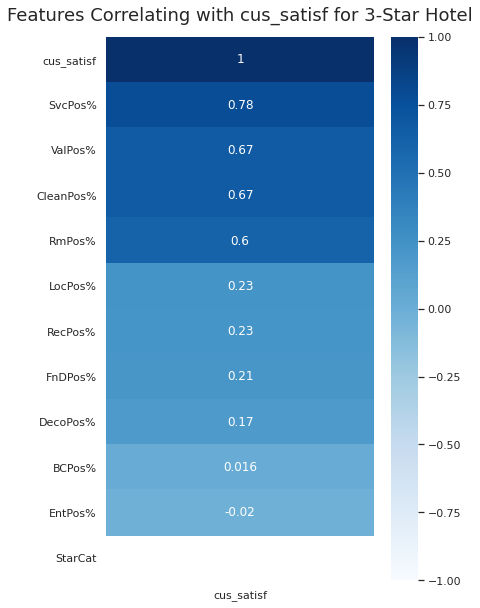

In [93]:
# Corr with cus_satisf for 3 Star hotel
plt.figure(figsize=(6, 10))
heatmap3A = sns.heatmap(hotel_SD3_corr[['cus_satisf']].sort_values(by='cus_satisf', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap3A.set_title('Features Correlating with cus_satisf for 3-Star Hotel', fontdict={'fontsize':18}, pad=16);

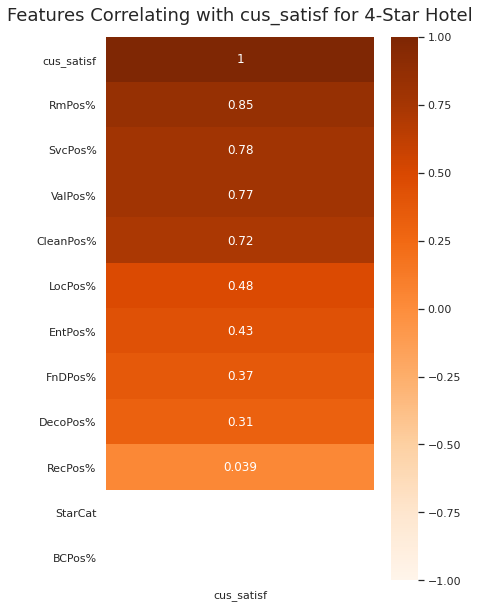

In [94]:
# Corr with cus_satisf for 4 Star hotel
plt.figure(figsize=(6, 10))
heatmap3B = sns.heatmap(hotel_SD4_corr[['cus_satisf']].sort_values(by='cus_satisf', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Oranges')
heatmap3B.set_title('Features Correlating with cus_satisf for 4-Star Hotel', fontdict={'fontsize':18}, pad=16);

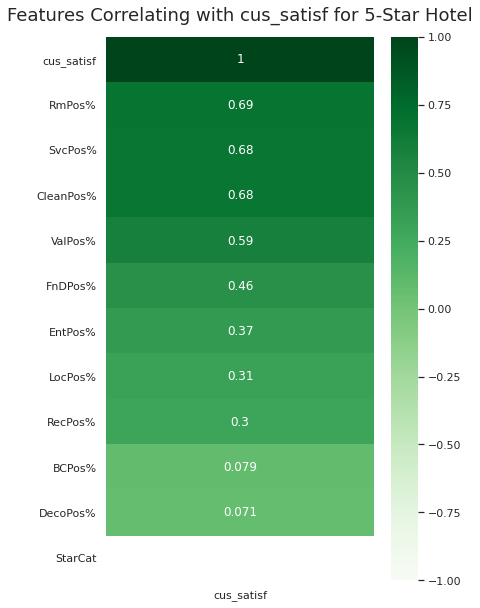

In [95]:
# Corr with cus_satisf for 5 Star hotel
plt.figure(figsize=(6, 10))
heatmap3C = sns.heatmap(hotel_SD5_corr[['cus_satisf']].sort_values(by='cus_satisf', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap3C.set_title('Features Correlating with cus_satisf for 5-Star Hotel', fontdict={'fontsize':18}, pad=16);

# END